# Belle II anomaly $B^+\rightarrow K^+ \nu \nu$

In [1]:
from alpaca import ALPcouplings
from alpaca.statistics.chisquared import get_chi2
from alpaca.statistics.functions import nsigmas
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'text.usetex':True})

In [2]:
transitions = [
    'B0 -> K*0 a',
    'B+ -> K+ a'
]

transitions_gen = [
    'B0 -> K*0 a',
    'B+ -> K+ a',
    'B+ -> K+ mu mu',
    'B0 -> K*0 mu mu'
]

## $m_a=2$ GeV (not charging  LH quarks) $c_V$, $c_A$

Idea is to follow Altmannshofer 2311.14629

In [3]:
ma = 2
fa = 1e3

csb_vec_pos = np.logspace(-8, -3, 100)
csb_axi_pos = np.logspace(-8, -3, 100)

cvec_pos, caxi_pos = np.meshgrid(csb_vec_pos, csb_axi_pos)

# Flatten the meshgrid arrays
cvec_flat = cvec_pos.flatten()
caxi_flat = caxi_pos.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for cvec_val, caxi_val in zip(cvec_flat, caxi_flat):
    #coupling = ALPcouplings({'cqL': np.array([[0, 0, 0], [0, 0, (cvec_val -  caxi_val)/2], [0, 0, 0]]), 'cuR': np.array([[0, 0, 0], [0, 0, (cvec_val +  caxi_val)/2], [0, 0, 0]]), 'cdR': np.array([[0, 0, 0], [0, 0, (cvec_val +  caxi_val)/2], [0, 0, 0]])}, scale=fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    coupling = ALPcouplings({'kD': np.array([[0, 0, 0], [0, 0, (cvec_val -  caxi_val)/2], [0, (cvec_val -  caxi_val)/2, 0] ]), 'kd': np.array([[0, 0, 0], [0, 0, (cvec_val +  caxi_val)/2], [0, (cvec_val +  caxi_val)/2, 0]])}, scale=100, basis='massbasis_ew').match_run(5.1, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_array_pos = np.array(couplings_list).reshape(cvec_pos.shape)
# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(csb_vec_pos.shape, fa)
ma_grid = np.full(csb_vec_pos.shape, ma)

In [4]:
chi2 = get_chi2(transitions, ma, couplings_array_pos, fa, integrator='leadinglog')
#chi22 = get_chi2(transitions, ma, couplings_array_pos2, fa, integrator='leadinglog')

/Users/mfzaso/Documents/Projects/P02_BtoKmumu/Programs/alp-aca/alpaca/statistics/chisquared.py:22: RuntimeWarning: divide by zero encountered in divide
  ctau = np.where(br_dark == 1.0, np.inf, 1e-7*hbarc_GeVnm/dw)
/Users/mfzaso/Documents/Projects/P02_BtoKmumu/Programs/alp-aca/alpaca/statistics/chisquared.py:22: RuntimeWarning: divide by zero encountered in divide
  ctau = np.where(br_dark == 1.0, np.inf, 1e-7*hbarc_GeVnm/dw)


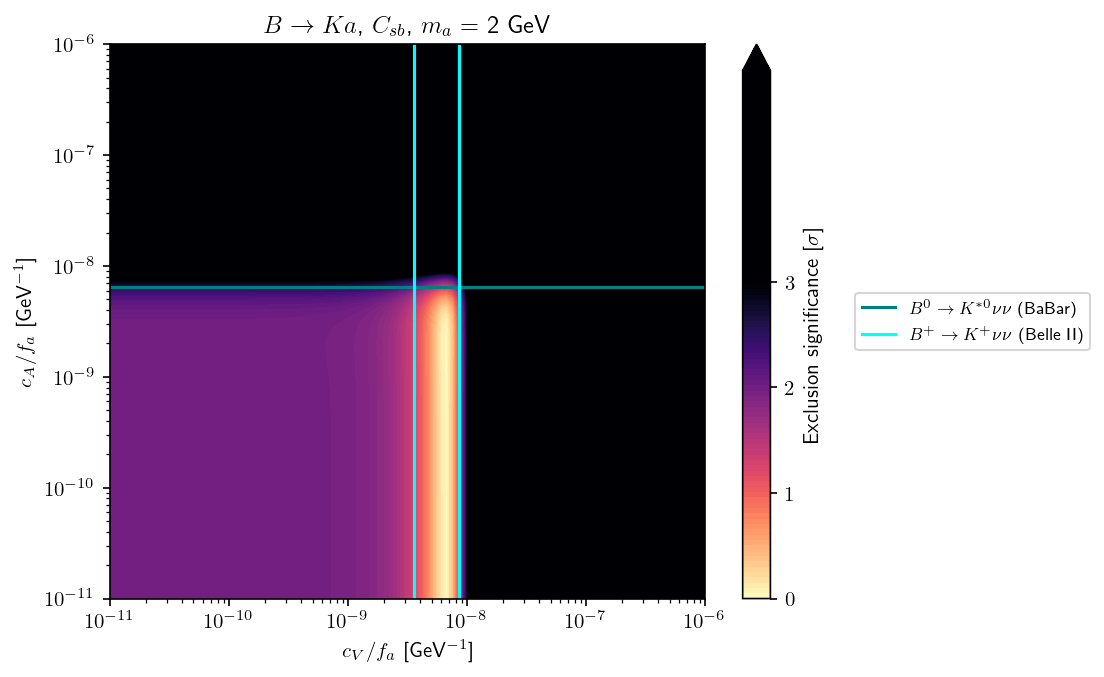

In [11]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal'}#, ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange', ('B+ -> K+ gamma gamma', 'BaBar'): 'blue', ('K+ -> pi+ a', 'NA62'): 'crimson'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$'}#, 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$', 'B+ -> K+ gamma gamma': r'$B^+ \to K^+ \gamma \gamma$', 'K+ -> pi+ a': r'$K^+ \to \pi^+ \nu \nu$'}
legend_elements = []

pl= plt.contourf(cvec_pos/fa, caxi_pos/fa, nsigmas(np.real(chi2[('', 'Global')]),2), levels=list(np.linspace(0, 5, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2.items():
    if observable == ('', 'Global'):
        break
    plt.contour(cvec_pos/fa, caxi_pos/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$c_V/f_a$ [GeV$^{-1}$]')
plt.ylabel(r'$c_A/f_a$ [GeV$^{-1}$]')
#plt.xlim(0.1, 5)
plt.title(rf'$B \to K a$, $C_{{sb}}$, $m_a=$ {ma} GeV')#, $f_a=$ {fa/1000} TeV')
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)

#### $m_a=0.1$ GeV 

In [115]:
ma = 0.1
fa = 1e3

csb_vec_pos = np.logspace(-5, -2, 100)
csb_axi_pos = np.logspace(-5, -2, 100)

cvec_pos, caxi_pos = np.meshgrid(csb_vec_pos, csb_axi_pos)

# Flatten the meshgrid arrays
cvec_flat = cvec_pos.flatten()
caxi_flat = caxi_pos.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for cvec_val, caxi_val in zip(cvec_flat, caxi_flat):
    #coupling = ALPcouplings({'cqL': np.array([[0, 0, 0], [0, 0, (cvec_val -  caxi_val)/2], [0, 0, 0]]), 'cuR': np.array([[0, 0, 0], [0, 0, (cvec_val +  caxi_val)/2], [0, 0, 0]]), 'cdR': np.array([[0, 0, 0], [0, 0, (cvec_val +  caxi_val)/2], [0, 0, 0]])}, scale=fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    coupling = ALPcouplings({'kD': np.array([[0, 0, 0], [0, 0, (cvec_val -  caxi_val)/2], [0, (cvec_val -  caxi_val)/2, 0] ]), 'kd': np.array([[0, 0, 0], [0, 0, (cvec_val +  caxi_val)/2], [0, (cvec_val +  caxi_val)/2, 0]])}, scale=100, basis='massbasis_ew').match_run(5.1, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_array_pos = np.array(couplings_list).reshape(cvec_pos.shape)
# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(csb_vec_pos.shape, fa)
ma_grid = np.full(csb_vec_pos.shape, ma)

In [116]:
chi2 = get_chi2(transitions_gen, ma, couplings_array_pos, fa, integrator='leadinglog')
#chi22 = get_chi2(transitions, ma, couplings_array_pos2, fa, integrator='leadinglog')

/Users/mfzaso/Documents/Projects/P02_BtoKmumu/Programs/alp-aca/alpaca/statistics/chisquared.py:22: RuntimeWarning: divide by zero encountered in divide
  ctau = np.where(br_dark == 1.0, np.inf, 1e-7*hbarc_GeVnm/dw)
/Users/mfzaso/Documents/Projects/P02_BtoKmumu/Programs/alp-aca/alpaca/statistics/chisquared.py:22: RuntimeWarning: divide by zero encountered in divide
  ctau = np.where(br_dark == 1.0, np.inf, 1e-7*hbarc_GeVnm/dw)
/Users/mfzaso/Documents/Projects/P02_BtoKmumu/Programs/alp-aca/alpaca/statistics/chisquared.py:22: RuntimeWarning: divide by zero encountered in divide
  ctau = np.where(br_dark == 1.0, np.inf, 1e-7*hbarc_GeVnm/dw)
/Users/mfzaso/Documents/Projects/P02_BtoKmumu/Programs/alp-aca/alpaca/decays/alp_decays/branching_ratios.py:150: RuntimeWarning: invalid value encountered in scalar divide
  ('electron', 'electron'): DWs['e']/DWs['DW_tot'],
/Users/mfzaso/Documents/Projects/P02_BtoKmumu/Programs/alp-aca/alpaca/decays/alp_decays/branching_ratios.py:151: RuntimeWarning: in

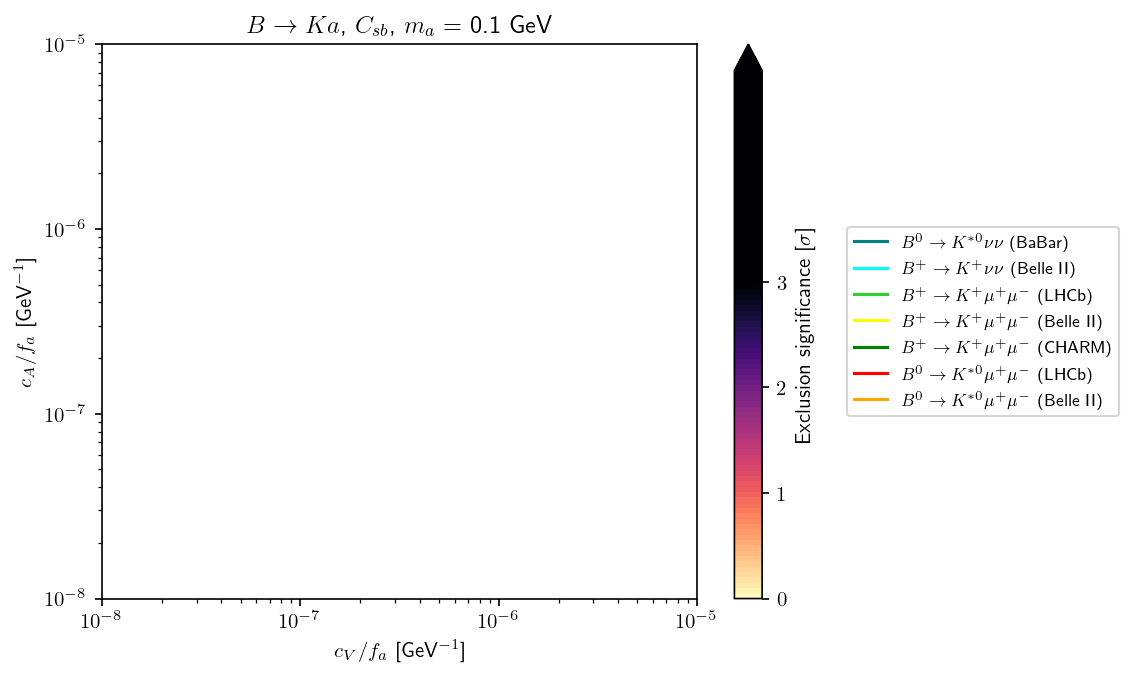

In [118]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal',  ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange'}#('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta',, ('B+ -> K+ gamma gamma', 'BaBar'): 'blue', ('K+ -> pi+ a', 'NA62'): 'crimson'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$'}#'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', , 'B+ -> K+ gamma gamma': r'$B^+ \to K^+ \gamma \gamma$', 'K+ -> pi+ a': r'$K^+ \to \pi^+ \nu \nu$'}
legend_elements = []

pl= plt.contourf(cvec_pos/fa, caxi_pos/fa, nsigmas(np.real(chi2[('', 'Global')]),2), levels=list(np.linspace(0, 5, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2.items():
    if observable == ('', 'Global'):
        break
    plt.contour(cvec_pos/fa, caxi_pos/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$c_V/f_a$ [GeV$^{-1}$]')
plt.ylabel(r'$c_A/f_a$ [GeV$^{-1}$]')
#plt.xlim(0.1, 5)
plt.title(rf'$B \to K a$, $C_{{sb}}$, $m_a=$ {ma} GeV')#, $f_a=$ {fa/1000} TeV')
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)

#### $m_a=4$ GeV 

In [ ]:
ma = 4
fa = 1e3

csb_vec_pos = np.logspace(-8, -3, 100)
csb_axi_pos = np.logspace(-8, -3, 100)

cvec_pos, caxi_pos = np.meshgrid(csb_vec_pos, csb_axi_pos)

# Flatten the meshgrid arrays
cvec_flat = cvec_pos.flatten()
caxi_flat = caxi_pos.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for cvec_val, caxi_val in zip(cvec_flat, caxi_flat):
    #coupling = ALPcouplings({'cqL': np.array([[0, 0, 0], [0, 0, (cvec_val -  caxi_val)/2], [0, 0, 0]]), 'cuR': np.array([[0, 0, 0], [0, 0, (cvec_val +  caxi_val)/2], [0, 0, 0]]), 'cdR': np.array([[0, 0, 0], [0, 0, (cvec_val +  caxi_val)/2], [0, 0, 0]])}, scale=fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    coupling = ALPcouplings({'kD': np.array([[0, 0, 0], [0, 0, (cvec_val -  caxi_val)/2], [0, (cvec_val -  caxi_val)/2, 0] ]), 'kd': np.array([[0, 0, 0], [0, 0, (cvec_val +  caxi_val)/2], [0, (cvec_val +  caxi_val)/2, 0]])}, scale=100, basis='massbasis_ew').match_run(5.1, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_array_pos = np.array(couplings_list).reshape(cvec_pos.shape)
# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(csb_vec_pos.shape, fa)
ma_grid = np.full(csb_vec_pos.shape, ma)

In [ ]:
chi2 = get_chi2(transitions, ma, couplings_array_pos, fa, integrator='leadinglog')
#chi22 = get_chi2(transitions, ma, couplings_array_pos2, fa, integrator='leadinglog')

/Users/mfzaso/Documents/Projects/P02_BtoKmumu/Programs/alp-aca/alpaca/statistics/chisquared.py:22: RuntimeWarning: divide by zero encountered in divide
  ctau = np.where(br_dark == 1.0, np.inf, 1e-7*hbarc_GeVnm/dw)
/Users/mfzaso/Documents/Projects/P02_BtoKmumu/Programs/alp-aca/alpaca/statistics/chisquared.py:22: RuntimeWarning: divide by zero encountered in divide
  ctau = np.where(br_dark == 1.0, np.inf, 1e-7*hbarc_GeVnm/dw)


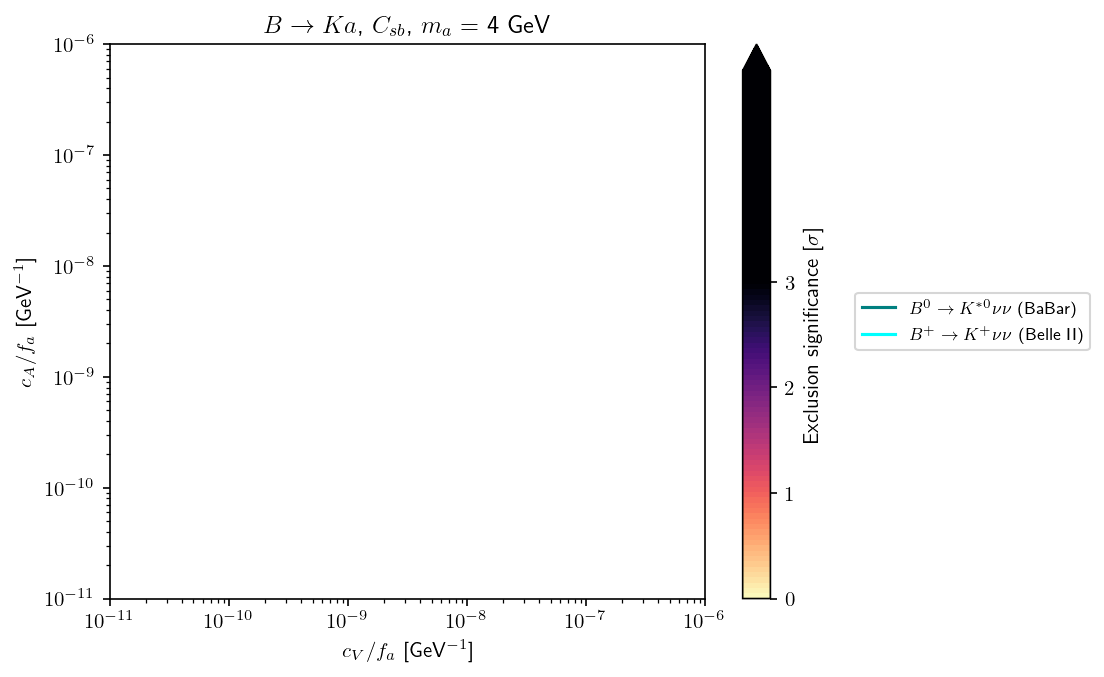

In [100]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal'}#, ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange', ('B+ -> K+ gamma gamma', 'BaBar'): 'blue', ('K+ -> pi+ a', 'NA62'): 'crimson'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$'}#, 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$', 'B+ -> K+ gamma gamma': r'$B^+ \to K^+ \gamma \gamma$', 'K+ -> pi+ a': r'$K^+ \to \pi^+ \nu \nu$'}
legend_elements = []

pl= plt.contourf(cvec_pos/fa, caxi_pos/fa, nsigmas(np.real(chi2[('', 'Global')]),2), levels=list(np.linspace(0, 5, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2.items():
    if observable == ('', 'Global'):
        break
    plt.contour(cvec_pos/fa, caxi_pos/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$c_V/f_a$ [GeV$^{-1}$]')
plt.ylabel(r'$c_A/f_a$ [GeV$^{-1}$]')
#plt.xlim(0.1, 5)
plt.title(rf'$B \to K a$, $C_{{sb}}$, $m_a=$ {ma} GeV')#, $f_a=$ {fa/1000} TeV')
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)

### Model QED-DFSZ

In [4]:
from alpaca.uvmodels.model_library import QED_DFSZ, beta

In [5]:
ma = 2 #np.logspace(np.log10(0.103), np.log10(5.0), 100)
fa_log = np.logspace(3, 11, 100)

coupling_DFSZ = [QED_DFSZ.get_couplings({beta: np.pi/2}, fa_val).match_run(5.1, 'VA_below', 'leadinglog') for fa_val in fa_log]

cDFSZ_vec = []
cDFSZ_axial = []

for ii in range(len(fa_log)):
    cDFSZ_axial.append(abs(coupling_DFSZ[ii]['cdA'][1,2])/fa_log[ii])
    cDFSZ_vec.append(abs(coupling_DFSZ[ii]['cdV'][1,2])/fa_log[ii])

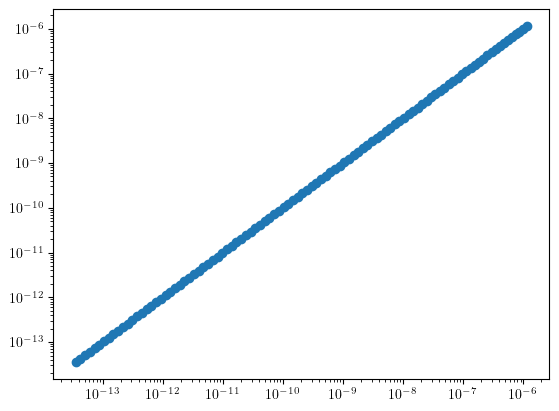

In [6]:
pl = plt.scatter(cDFSZ_vec, cDFSZ_axial)
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

### Model KSVZ-Q

In [7]:
from alpaca.uvmodels.model_library import Q_KSVZ, KSVZ_charge

In [8]:
ma = 2 
fa_log = np.logspace(3, 11, 100)

coupling_KSVZ = [Q_KSVZ.get_couplings({KSVZ_charge: 1}, 4*np.pi*fa_val).match_run(5.1, 'VA_below', 'leadinglog') for fa_val in fa_log]

cKSVZ_vec = []
cKSVZ_axial = []

for ii in range(len(fa_log)):
    cKSVZ_axial.append(np.abs(coupling_KSVZ[ii]['cdA'][1,2])/fa_log[ii])
    cKSVZ_vec.append(np.abs(coupling_KSVZ[ii]['cdV'][1,2])/fa_log[ii])

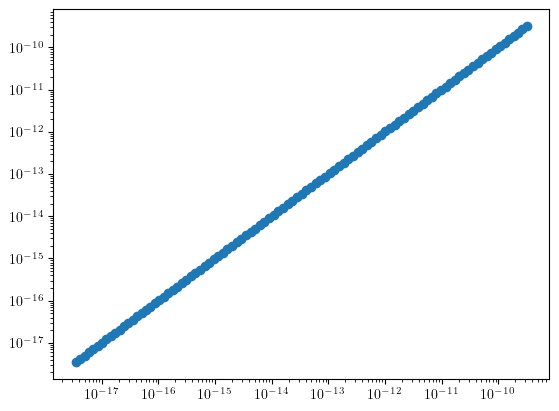

In [9]:
plt.scatter(cKSVZ_vec, cKSVZ_axial)
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

### Model top-philic

In [10]:
fa = 1e3

ma = 2 #np.logspace(np.log10(0.103), np.log10(5.0), 100)
ct_pos = np.logspace(-8, 0, 100)

coupling = [ALPcouplings({'cuR': np.diag([0, 0, ct])}, scale=fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') for ct in ct_pos]

ctop_vec = []
ctop_axial = []

for ii in range(len(ct_pos)):
    ctop_axial.append(abs(coupling[ii]['cdA'][1,2])/fa)
    ctop_vec.append(abs(coupling[ii]['cdV'][1,2])/fa)

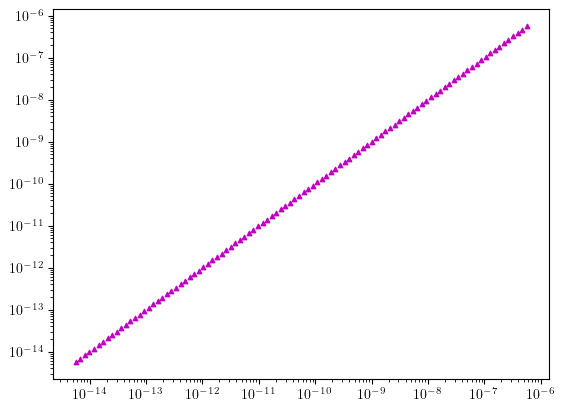

In [11]:
pl = plt.scatter(ctop_vec, ctop_axial, c='m',s=10,marker='^')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

### Model flaxion

In [12]:
from alpaca.uvmodels.model_library import flaxion_benchmark

In [13]:
ma = 2 
fa_log = np.logspace(3, 11, 100)

coupling_flaxion = [flaxion_benchmark.get_couplings(0.2, 4*np.pi*fa_val).match_run(5.1, 'VA_below', 'leadinglog') for fa_val in fa_log]

cflaxion_vec = []
cflaxion_axial = []

for ii in range(len(fa_log)):
    cflaxion_axial.append(np.abs(coupling_flaxion[ii]['cdA'][1,2])/fa_log[ii])
    cflaxion_vec.append(np.abs(coupling_flaxion[ii]['cdV'][1,2])/fa_log[ii])

Text(0, 0.5, '$c_A^{sb}/f_a \\, \\left[\\textrm{GeV}^{-1}\\right]$')

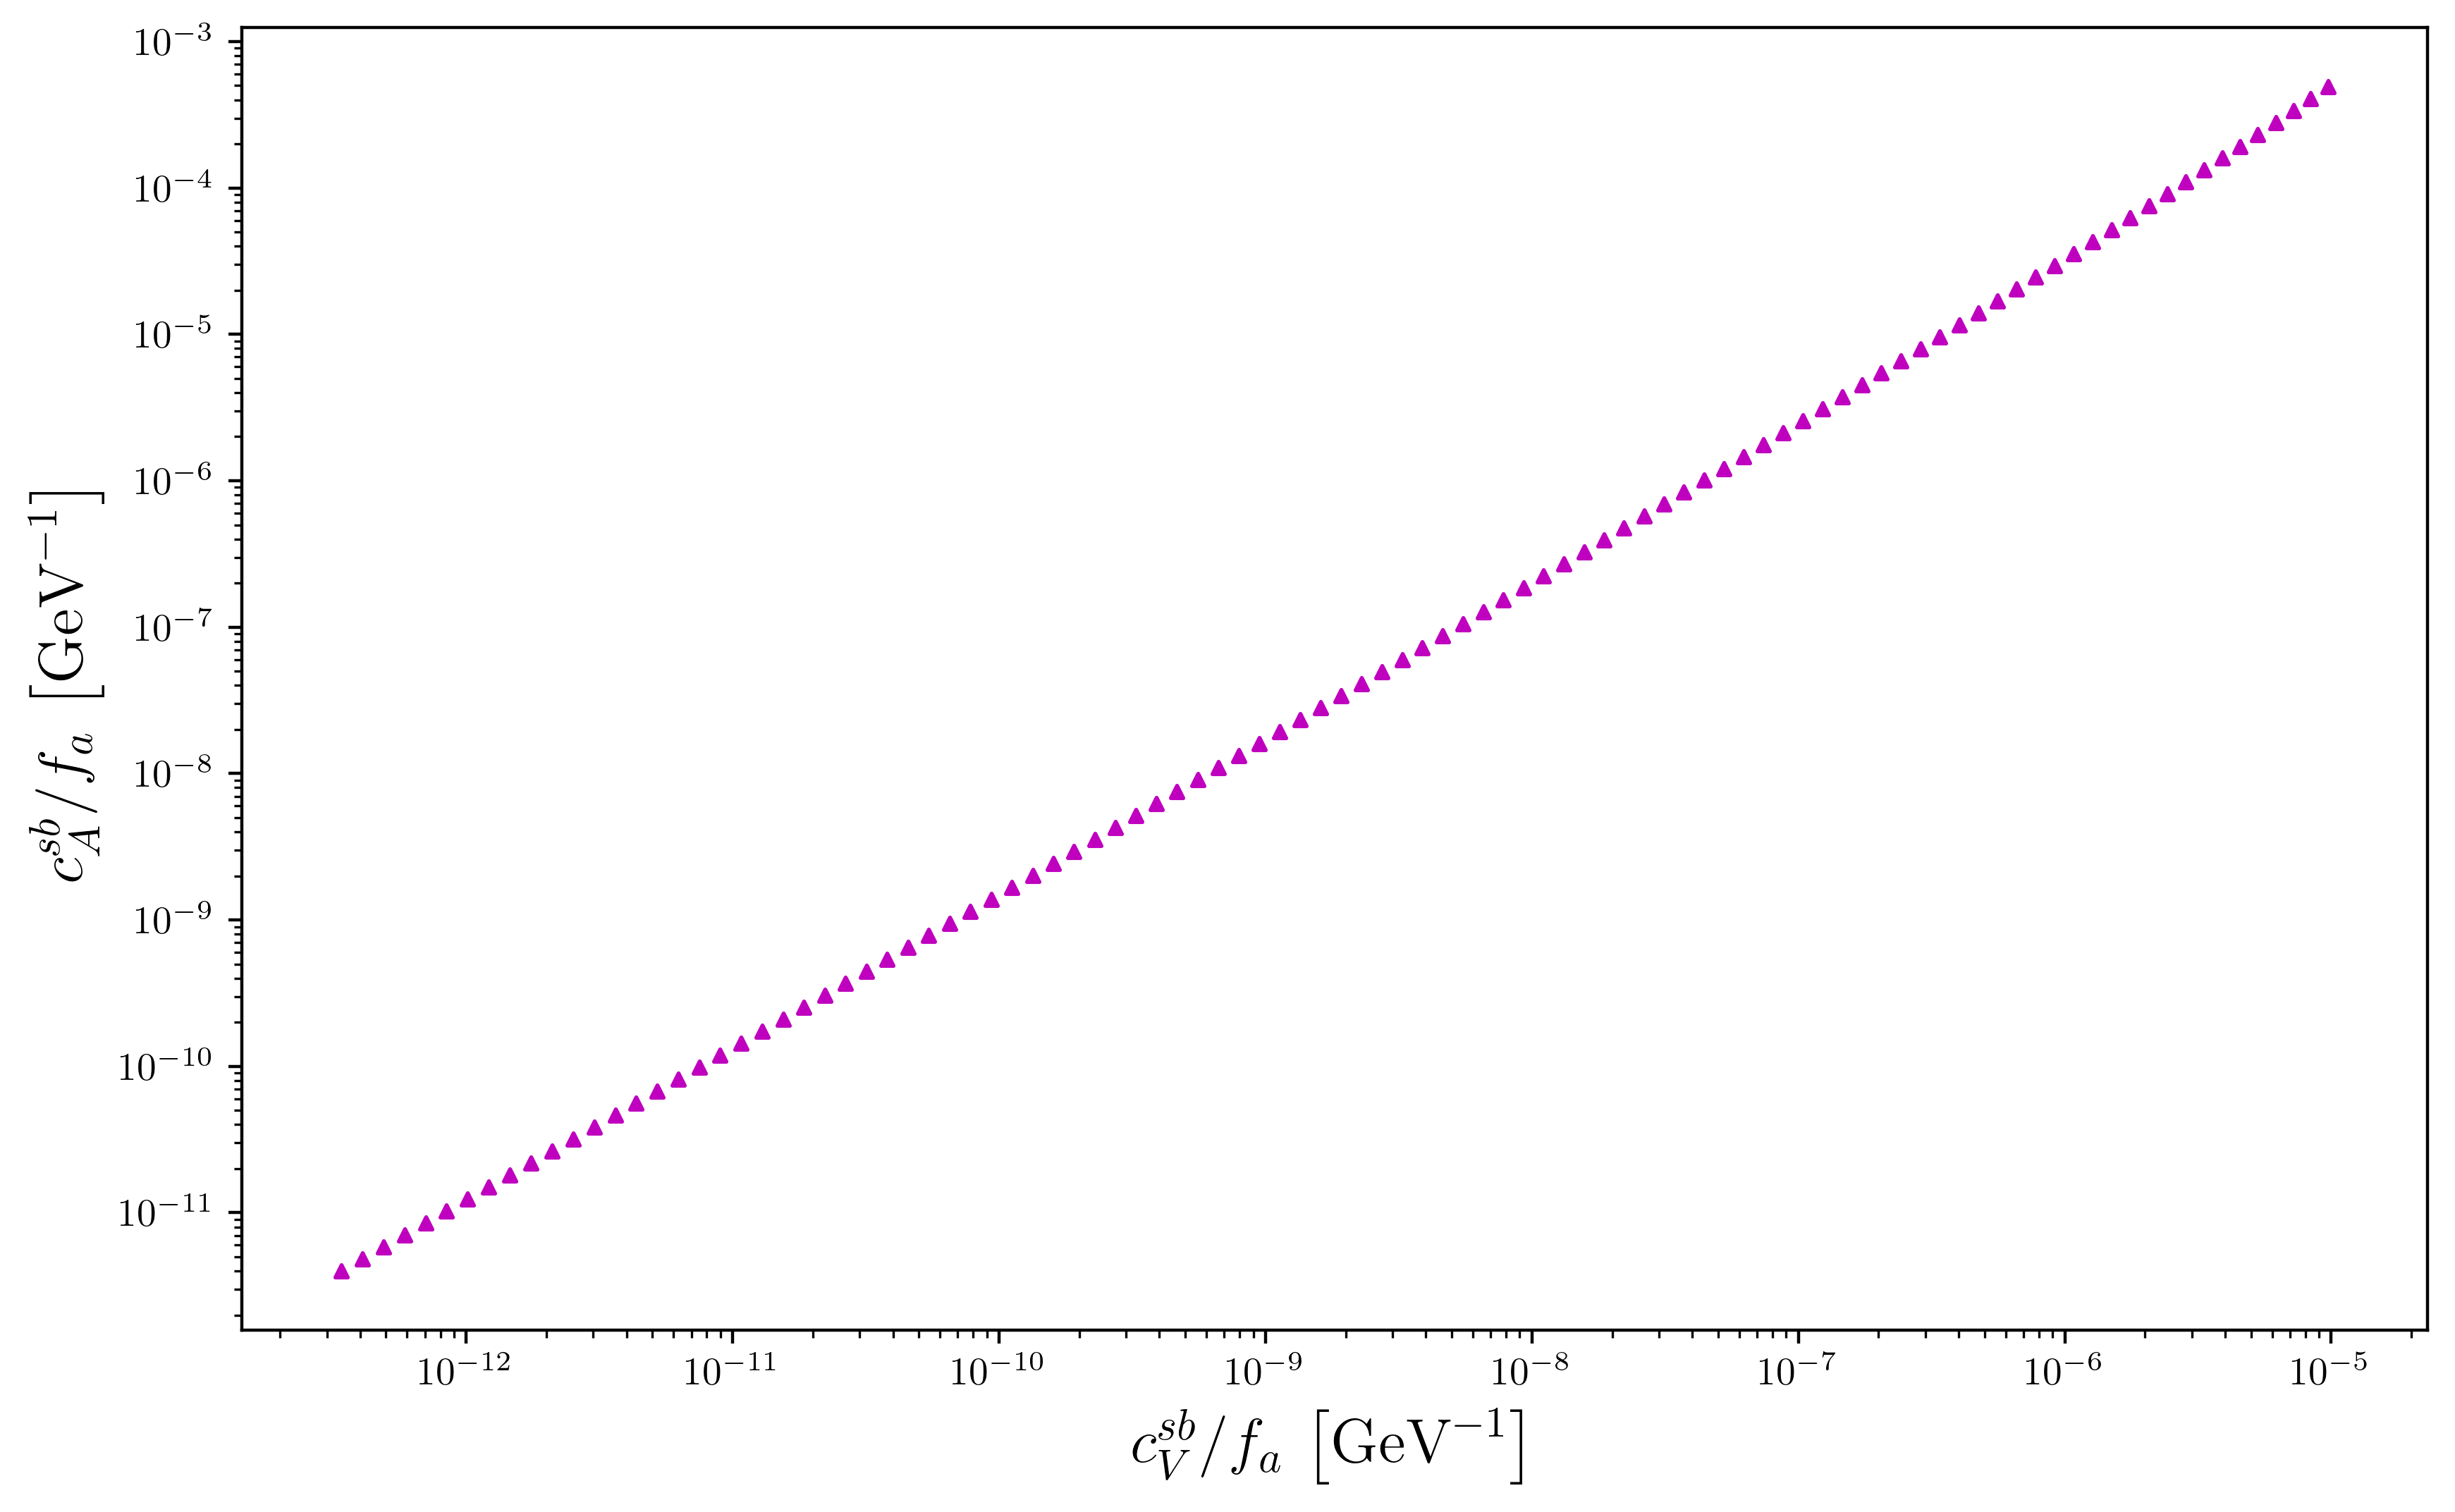

In [13]:
fig, ax = plt.subplots(figsize=(25.4/2.54, 6*2.54/2.54), dpi=400) 

pl = plt.scatter(cflaxion_vec, cflaxion_axial, c='m',s=10,marker='^')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r"$c_V^{sb}/f_a \, \left[\textrm{GeV}^{-1}\right]$", fontsize=16)
ax.set_ylabel(r"$c_A^{sb}/f_a \, \left[\textrm{GeV}^{-1}\right]$", fontsize=16)

### Summary plot

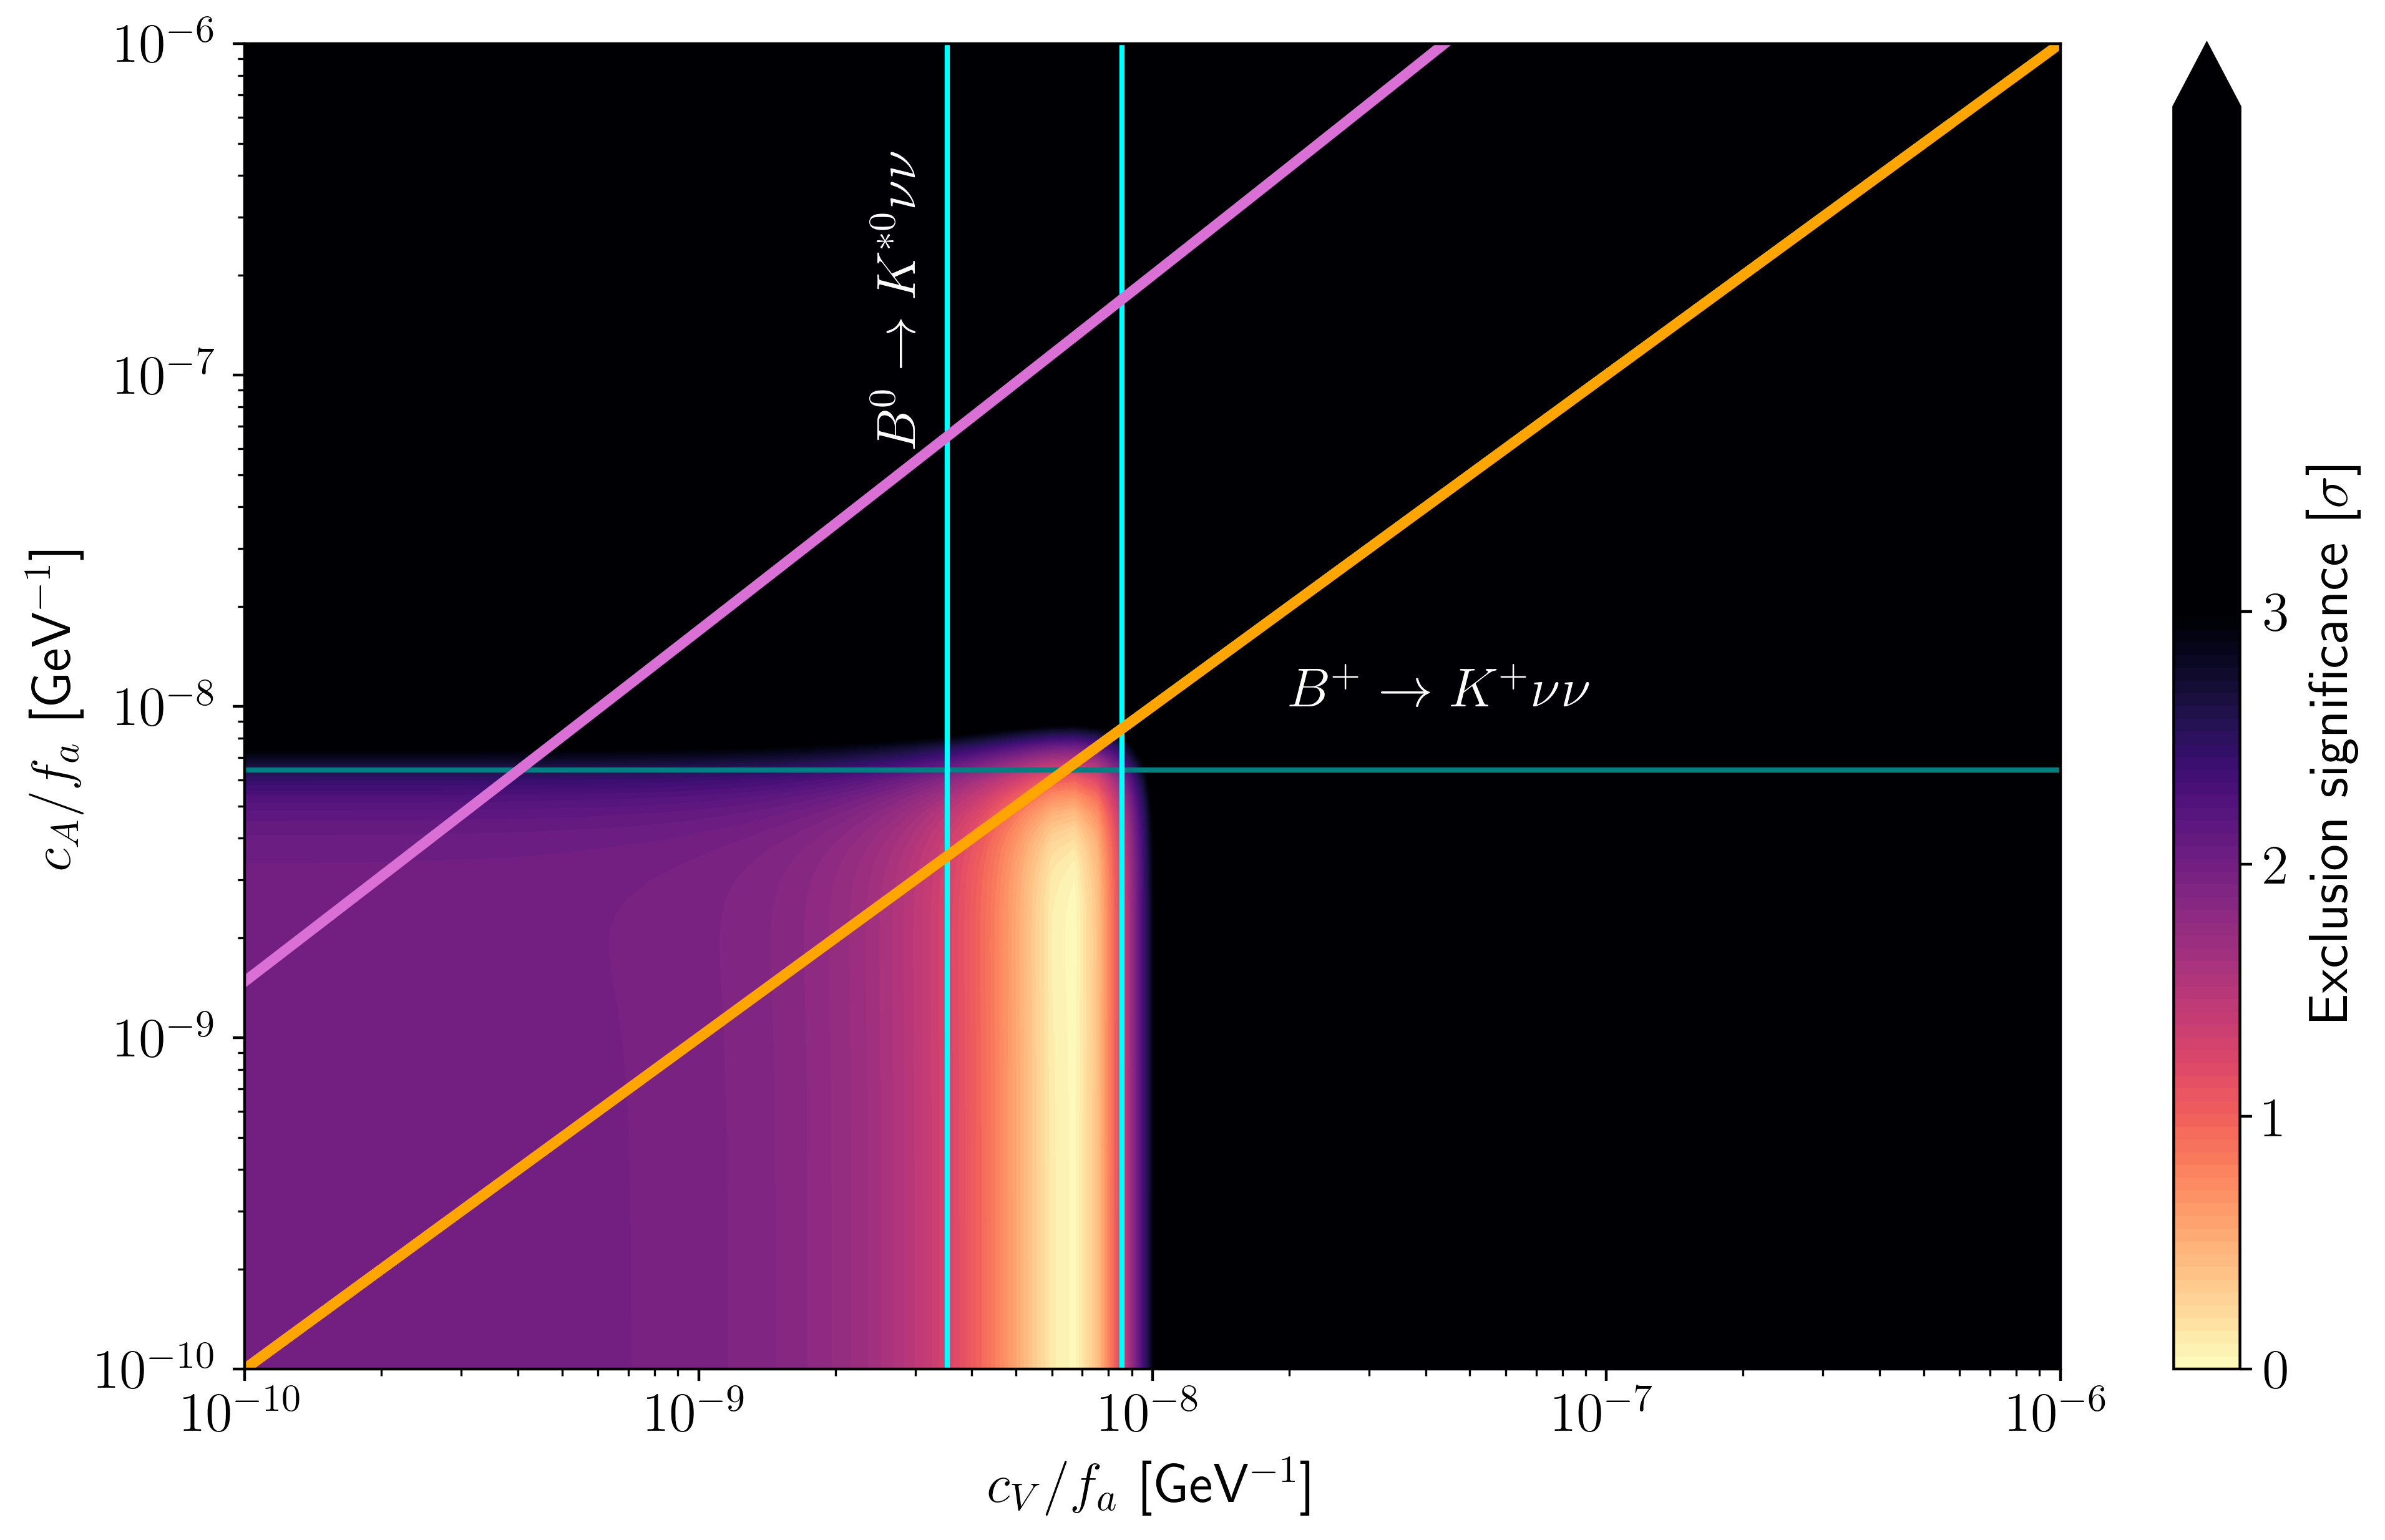

In [27]:
fig, ax = plt.subplots(figsize=(25.4/2.54, 6*2.54/2.54), dpi=400) 

colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal'}#, ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange', ('B+ -> K+ gamma gamma', 'BaBar'): 'blue', ('K+ -> pi+ a', 'NA62'): 'crimson'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$'}#, 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$', 'B+ -> K+ gamma gamma': r'$B^+ \to K^+ \gamma \gamma$', 'K+ -> pi+ a': r'$K^+ \to \pi^+ \nu \nu$'}
#legend_elements = []

pl= plt.contourf(cvec_pos/fa, caxi_pos/fa, nsigmas(np.real(chi2[('', 'Global')]),2), levels=list(np.linspace(0, 5, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2.items():
    if observable == ('', 'Global'):
        break
    plt.contour(cvec_pos/fa, caxi_pos/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    #legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
plt.plot(cDFSZ_vec, cDFSZ_axial, c='orange', label = 'DFSZ-QED', linewidth=3)
plt.plot(cKSVZ_vec, cKSVZ_axial, c='orange', label = 'KSVZ-Q', linewidth=3)
plt.plot(ctop_vec, ctop_axial, c='orange', label = 'Top-philic', linewidth=3)
plt.plot(cflaxion_vec, cflaxion_axial, c='orchid', label = 'Flaxion', linewidth=3)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]', fontsize=16)
cb.set_ticks([0, 1, 2, 3])
cb.ax.tick_params(labelsize=16)
modb=plt.text(2e-8,1e-8, r'$B^+ \to K^+ \nu \nu$', color = "white",fontsize = 16)
modb=plt.text(3e-9,6e-8, r'$B^0 \to K^{*0} \nu \nu$', color = "white",fontsize = 16,rotation=90, rotation_mode='anchor',
              transform_rotates_text=True)
plt.xlabel(r'$c_V/f_a$ [GeV$^{-1}$]', fontsize=16)
plt.ylabel(r'$c_A/f_a$ [GeV$^{-1}$]', fontsize=16)
plt.xlim(10e-11, 1e-6)
plt.ylim(10e-11, 1e-6)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
#plt.title(rf'$B \to K a$, $C_{{sb}}$, $m_a=$ {ma} GeV')#, $f_a=$ {fa/1000} TeV')
#plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)

plt.tight_layout(pad=0.1)
plt.savefig('belle_II_cVcA.png', dpi=400)
plt.savefig('belle_II_cVcA.pdf', dpi=400)

# Various

## $m_a=2$ GeV (not charging  LH quarks) $c_L$, $c_R$

Idea is to follow Altmannshofer 2311.14629

In [27]:
ma = 2
fa = 1e3

csb_l_pos = np.logspace(-8, -3, 100)
csb_r_pos = np.logspace(-8, -3, 100)

cl_pos, cr_pos = np.meshgrid(csb_l_pos, csb_r_pos)

# Flatten the meshgrid arrays
cl_flat = cl_pos.flatten()
cr_flat = cr_pos.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []
couplings_list_top = []

# Iterate over the flattened arrays and create ALPcouplings objects
for cl_val, cr_val in zip(cl_flat, cr_flat):
    coupling = ALPcouplings({'kD': np.array([[0, 0, 0], [0, 0, cl_val], [0, cl_val, 0] ]), 'kd': np.array([[0, 0, 0], [0, 0, cr_val], [0, cr_val, 0]])}, scale=100, basis='massbasis_ew').match_run(5.1, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)
    couplings_list_top.append(coupling_top)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_array_pos = np.array(couplings_list).reshape(cl_pos.shape)
couplings_array_pos_top = np.array(couplings_list_top).reshape(cl_pos.shape)


# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(csb_l_pos.shape, fa)
ma_grid = np.full(csb_l_pos.shape, ma)

In [28]:
chi2 = get_chi2(transitions, ma, couplings_array_pos, fa, integrator='leadinglog')
chi22 = get_chi2(transitions, ma, couplings_array_pos_top, fa, integrator='leadinglog')

/Users/mfzaso/Documents/Projects/P02_BtoKmumu/Programs/alp-aca/alpaca/statistics/chisquared.py:17: RuntimeWarning: divide by zero encountered in divide
  ctau = np.where(br_dark == 1.0, np.inf, 1e-7*hbarc_GeVnm/dw)
/Users/mfzaso/Documents/Projects/P02_BtoKmumu/Programs/alp-aca/alpaca/statistics/chisquared.py:17: RuntimeWarning: divide by zero encountered in divide
  ctau = np.where(br_dark == 1.0, np.inf, 1e-7*hbarc_GeVnm/dw)


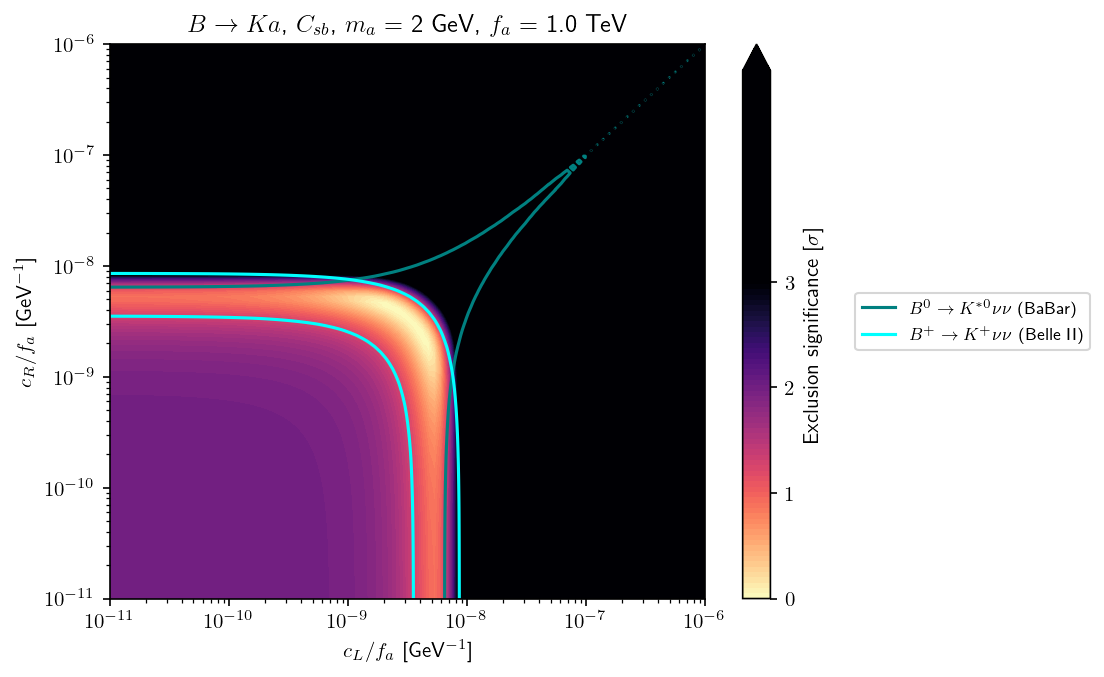

In [29]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal'}#, ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange', ('B+ -> K+ gamma gamma', 'BaBar'): 'blue', ('K+ -> pi+ a', 'NA62'): 'crimson'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$'}#, 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$', 'B+ -> K+ gamma gamma': r'$B^+ \to K^+ \gamma \gamma$', 'K+ -> pi+ a': r'$K^+ \to \pi^+ \nu \nu$'}
legend_elements = []

pl= plt.contourf(cl_pos/fa, cr_pos/fa, nsigmas(np.real(chi2[('', 'Global')]),2), levels=list(np.linspace(0, 5, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2.items():
    if observable == ('', 'Global'):
        break
    plt.contour(cl_pos/fa, cr_pos/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$c_L/f_a$ [GeV$^{-1}$]')
plt.ylabel(r'$c_R/f_a$ [GeV$^{-1}$]')
#plt.xlim(0.1, 5)
plt.title(rf'$B \to K a$, $C_{{sb}}$, $m_a=$ {ma} GeV')
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)

## $m_a=2$ GeV

Idea is to follow Altmannshofer 2311.14629

In [ ]:
ma = 2
fa = 1e3

csb_vec_pos = np.logspace(-8, -3, 100)
csb_axi_pos = np.logspace(-8, -3, 100)

cvec_pos, caxi_pos = np.meshgrid(csb_vec_pos, csb_axi_pos)

# Flatten the meshgrid arrays
cvec_flat = cvec_pos.flatten()
caxi_flat = caxi_pos.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for cvec_val, caxi_val in zip(cvec_flat, caxi_flat):
    #coupling = ALPcouplings({'cqL': np.array([[0, 0, 0], [0, 0, (cvec_val -  caxi_val)/2], [0, 0, 0]]), 'cuR': np.array([[0, 0, 0], [0, 0, (cvec_val +  caxi_val)/2], [0, 0, 0]]), 'cdR': np.array([[0, 0, 0], [0, 0, (cvec_val +  caxi_val)/2], [0, 0, 0]])}, scale=fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    coupling = ALPcouplings({'cqL': 0, 'cuR': 0, 'cdR': np.array([[0, 0, 0], [0, 0, (cvec_val +  caxi_val)/2], [0, (cvec_val +  caxi_val)/2, 0]])}, scale=4*np.pi*fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_array_pos = np.array(couplings_list).reshape(cvec_pos.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(csb_vec_pos.shape, fa)
ma_grid = np.full(csb_vec_pos.shape, ma)
chi2 = get_chi2(transitions, ma, couplings_array_pos, fa, integrator='leadinglog')
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal'}#, ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange', ('B+ -> K+ gamma gamma', 'BaBar'): 'blue', ('K+ -> pi+ a', 'NA62'): 'crimson'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$'}#, 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$', 'B+ -> K+ gamma gamma': r'$B^+ \to K^+ \gamma \gamma$', 'K+ -> pi+ a': r'$K^+ \to \pi^+ \nu \nu$'}
legend_elements = []

pl= plt.contourf(cvec_pos/fa, caxi_pos/fa, nsigmas(np.real(chi2[('', 'Global')]),2), levels=list(np.linspace(0, 5, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2.items():
    if observable == ('', 'Global'):
        break
    plt.contour(cvec_pos/fa, caxi_pos/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$c_V/f_a$ [GeV$^{-1}$]')
plt.ylabel(r'$c_A/f_a$ [GeV$^{-1}$]')
#plt.xlim(0.1, 5)
plt.title(rf'$B \to K a$, $C_{{sb}}$, $m_a=$ {ma} GeV, $f_a=$ {fa/1000} TeV')
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)

NameError: name 'np' is not defined

In [17]:
ma = 2
fa = 1e3

csb_vec_pos = np.logspace(-8, -3, 100)
csb_axi_pos = np.logspace(-8, -3, 100)

cvec_pos, caxi_pos = np.meshgrid(csb_vec_pos, csb_axi_pos)

# Flatten the meshgrid arrays
cvec_flat = cvec_pos.flatten()
caxi_flat = caxi_pos.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for cvec_val, caxi_val in zip(cvec_flat, caxi_flat):
    #coupling = ALPcouplings({'cqL': np.array([[0, 0, 0], [0, 0, (cvec_val -  caxi_val)/2], [0, 0, 0]]), 'cuR': np.array([[0, 0, 0], [0, 0, (cvec_val +  caxi_val)/2], [0, 0, 0]]), 'cdR': np.array([[0, 0, 0], [0, 0, (cvec_val +  caxi_val)/2], [0, 0, 0]])}, scale=fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    coupling = ALPcouplings({'cqL': np.array([[0, 0, 0], [0, 0, (cvec_val -  caxi_val)/2], [0, (cvec_val -  caxi_val)/2, 0] ]), 'cuR': 0, 'cdR': np.array([[0, 0, 0], [0, 0, (cvec_val +  caxi_val)/2], [0, (cvec_val +  caxi_val)/2, 0]])}, scale=4*np.pi*fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_array_pos = np.array(couplings_list).reshape(cvec_pos.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(csb_vec_pos.shape, fa)
ma_grid = np.full(csb_vec_pos.shape, ma)

In [5]:
chi2 = get_chi2(transitions, ma, couplings_array_pos, fa, integrator='leadinglog')

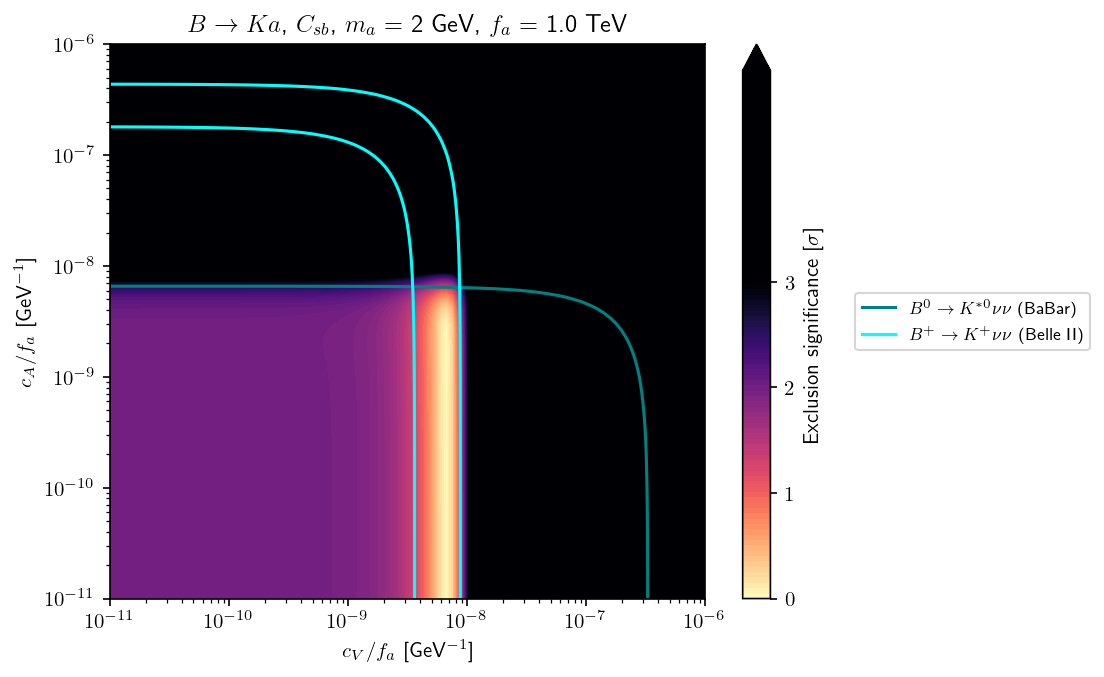

In [6]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal'}#, ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange', ('B+ -> K+ gamma gamma', 'BaBar'): 'blue', ('K+ -> pi+ a', 'NA62'): 'crimson'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$'}#, 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$', 'B+ -> K+ gamma gamma': r'$B^+ \to K^+ \gamma \gamma$', 'K+ -> pi+ a': r'$K^+ \to \pi^+ \nu \nu$'}
legend_elements = []

pl= plt.contourf(cvec_pos/fa, caxi_pos/fa, nsigmas(np.real(chi2[('', 'Global')]),2), levels=list(np.linspace(0, 5, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2.items():
    if observable == ('', 'Global'):
        break
    plt.contour(cvec_pos/fa, caxi_pos/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$c_V/f_a$ [GeV$^{-1}$]')
plt.ylabel(r'$c_A/f_a$ [GeV$^{-1}$]')
#plt.xlim(0.1, 5)
plt.title(rf'$B \to K a$, $C_{{sb}}$, $m_a=$ {ma} GeV, $f_a=$ {fa/1000} TeV')
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)

In [1]:
ma = 2
fa = 1e3

csb_vec_pos = np.logspace(-8, -3, 100)
csb_axi_pos = np.logspace(-8, -3, 100)

cvec_pos, caxi_pos = np.meshgrid(csb_vec_pos, csb_axi_pos)

# Flatten the meshgrid arrays
cvec_flat = cvec_pos.flatten()
caxi_flat = caxi_pos.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for cvec_val, caxi_val in zip(cvec_flat, caxi_flat):
    #coupling = ALPcouplings({'cqL': np.array([[0, 0, 0], [0, 0, (cvec_val -  caxi_val)/2], [0, 0, 0]]), 'cuR': np.array([[0, 0, 0], [0, 0, (cvec_val +  caxi_val)/2], [0, 0, 0]]), 'cdR': np.array([[0, 0, 0], [0, 0, (cvec_val +  caxi_val)/2], [0, 0, 0]])}, scale=fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    coupling = ALPcouplings({'cqL': 0, 'cuR': 0, 'cdR': np.array([[0, 0, 0], [0, 0, (cvec_val +  caxi_val)/2], [0, (cvec_val +  caxi_val)/2, 0]])}, scale=4*np.pi*fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_array_pos = np.array(couplings_list).reshape(cvec_pos.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(csb_vec_pos.shape, fa)
ma_grid = np.full(csb_vec_pos.shape, ma)
chi2 = get_chi2(transitions, ma, couplings_array_pos, fa, integrator='leadinglog')
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal'}#, ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange', ('B+ -> K+ gamma gamma', 'BaBar'): 'blue', ('K+ -> pi+ a', 'NA62'): 'crimson'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$'}#, 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$', 'B+ -> K+ gamma gamma': r'$B^+ \to K^+ \gamma \gamma$', 'K+ -> pi+ a': r'$K^+ \to \pi^+ \nu \nu$'}
legend_elements = []

pl= plt.contourf(cvec_pos/fa, caxi_pos/fa, nsigmas(np.real(chi2[('', 'Global')]),2), levels=list(np.linspace(0, 5, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2.items():
    if observable == ('', 'Global'):
        break
    plt.contour(cvec_pos/fa, caxi_pos/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$c_V/f_a$ [GeV$^{-1}$]')
plt.ylabel(r'$c_A/f_a$ [GeV$^{-1}$]')
#plt.xlim(0.1, 5)
plt.title(rf'$B \to K a$, $C_{{sb}}$, $m_a=$ {ma} GeV, $f_a=$ {fa/1000} TeV')
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)

NameError: name 'np' is not defined

## General mass, favoured $c_V$

In [20]:
fa = 1e3

csb_vec_prefer = 7e-9

ma_log_pos = np.logspace(np.log10(0.103), np.log10(5.0), 50)
csb_axi_pos = np.logspace(-8, -3, 100)

x_ma_pos, y_caxi_pos = np.meshgrid(ma_log_pos, csb_axi_pos)

# Flatten the meshgrid arrays
ma_flat = x_ma_pos.flatten()
caxi_flat = y_caxi_pos.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for caxi_val in caxi_flat:
    #coupling = ALPcouplings({'cqL': np.array([[0, 0, 0], [0, 0, (cvec_val -  caxi_val)/2], [0, 0, 0]]), 'cuR': np.array([[0, 0, 0], [0, 0, (cvec_val +  caxi_val)/2], [0, 0, 0]]), 'cdR': np.array([[0, 0, 0], [0, 0, (cvec_val +  caxi_val)/2], [0, 0, 0]])}, scale=fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    #coupling = ALPcouplings({'cqL': np.array([[0, 0, 0], [0, 0, (csb_vec_prefer*fa -  caxi_val)/2], [0, (csb_vec_prefer*fa -  caxi_val)/2, 0] ]), 'cuR': 0, 'cdR': np.array([[0, 0, 0], [0, 0, (csb_vec_prefer*fa +  caxi_val)/2], [0, (csb_vec_prefer*fa +  caxi_val)/2, 0]])}, scale=4*np.pi*fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    coupling = ALPcouplings({'kD': np.array([[0, 0, 0], [0, 0, (csb_vec_prefer*fa -  caxi_val)/2], [0, (csb_vec_prefer*fa -  caxi_val)/2, 0] ]), 'kd': np.array([[0, 0, 0], [0, 0, (csb_vec_prefer*fa +  caxi_val)/2], [0, (csb_vec_prefer*fa +  caxi_val)/2, 0]])}, scale=100, basis='massbasis_ew').match_run(5.1, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_array_pos = np.array(couplings_list).reshape(y_caxi_pos.shape)

In [21]:
chi2 = get_chi2(transitions, ma_log_pos, couplings_array_pos, fa, integrator='leadinglog')

/Users/mfzaso/Documents/Projects/P02_BtoKmumu/Programs/alp-aca/alpaca/statistics/chisquared.py:17: RuntimeWarning: divide by zero encountered in divide
  ctau = np.where(br_dark == 1.0, np.inf, 1e-7*hbarc_GeVnm/dw)
/Users/mfzaso/Documents/Projects/P02_BtoKmumu/Programs/alp-aca/alpaca/statistics/chisquared.py:17: RuntimeWarning: divide by zero encountered in divide
  ctau = np.where(br_dark == 1.0, np.inf, 1e-7*hbarc_GeVnm/dw)


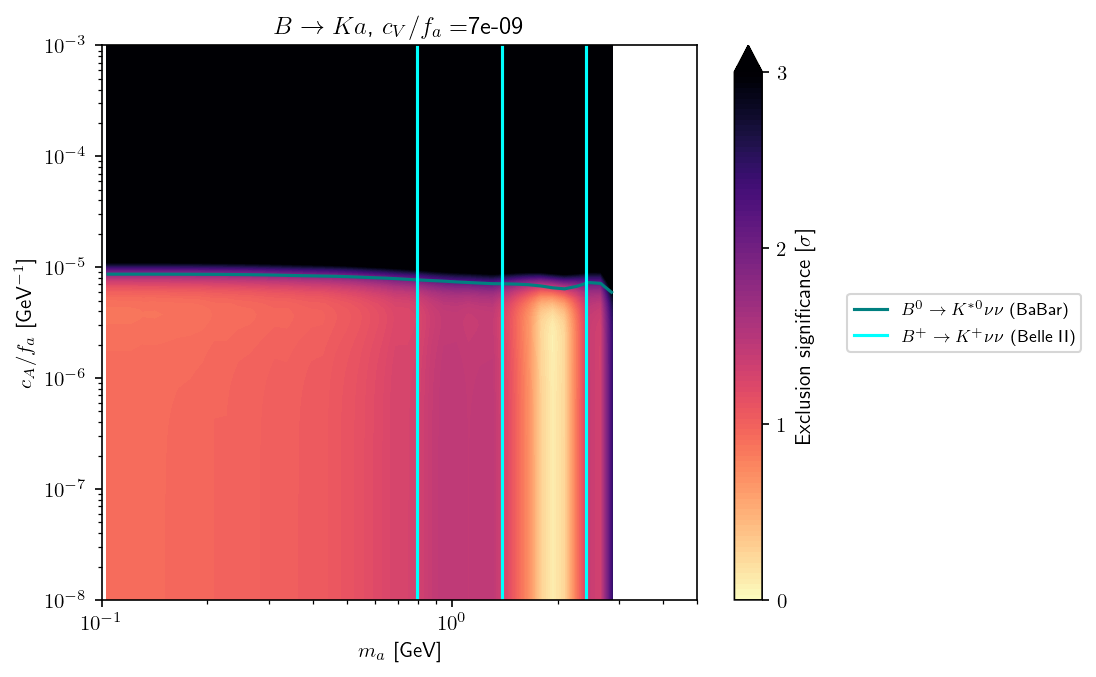

In [22]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal'}#, ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$'}#, 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$'}
legend_elements = []
pl = plt.contourf(x_ma_pos, y_caxi_pos, nsigmas(chi2[('', 'Global')],2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2.items():
    if observable == ('', 'Global'):
        break
    plt.contour(x_ma_pos, y_caxi_pos, nsigmas(chi2_obs, 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$c_A/f_a$ [GeV$^{-1}$]')
plt.xlim(0.1, 5)
plt.title(rf'$B \to K a$, $c_V/f_a=${csb_vec_prefer }')
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)

## QED-DFSZ model

In [37]:
from alpaca.uvmodels.model_library import d_DFSZ, beta


In [ ]:
get_couplings = np.vectorize(lambda f: d_DFSZ.get_couplings({beta: np.pi/2}, f).match_run(10, 'VA_below', matching_scale=80))

## $c_L=c_R$
In this scenario, only vectorial couplings (will explain anomaly)

In [11]:
ma = np.hstack([np.logspace(-1, 0, 60), np.linspace(1.01, 5, 60)])
cl = np.logspace(-5, -8, 50)
fa = 1e3

x_ma, y_cl = np.meshgrid(ma, cl)

cl_flat = y_cl.flatten()
#couplings = [ALPcouplings({'cqL': np.array([[0, 0, 0], [0, 0, cl], [0, cl, 0] ]), 'cdR':np.array([[0, 0, 0], [0, 0, cl], [0, cl, 0]])}, scale=4*np.pi*fa, basis='derivative_above').match_run(5.1, 'VA_below') for cl in cl_flat]
#couplings = [ALPcouplings({'cqL': np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0] ]), 'cdR':np.array([[0, 0, 0], [0, 0, cl], [0, cl, 0]])}, scale=4*np.pi*fa, basis='derivative_above').match_run(5.1, 'VA_below') for cl in cl_flat]
couplings = [ALPcouplings({'kD': np.array([[0, 0, 0], [0, 0, cl], [0, cl, 0] ]), 'kd': np.array([[0, 0, 0], [0, 0, cl], [0, cl, 0]])}, scale=100, basis='massbasis_ew').match_run(5.1, 'VA_below', 'leadinglog') for cl in cl_flat]
couplings_array = np.array(couplings).reshape(y_cl.shape)


In [12]:
chi2 = get_chi2(transitions, x_ma, couplings_array, fa, integrator='leadinglog')

/Users/mfzaso/Documents/Projects/P02_BtoKmumu/Programs/alp-aca/alpaca/statistics/chisquared.py:17: RuntimeWarning: divide by zero encountered in divide
  ctau = np.where(br_dark == 1.0, np.inf, 1e-7*hbarc_GeVnm/dw)
/Users/mfzaso/Documents/Projects/P02_BtoKmumu/Programs/alp-aca/alpaca/statistics/chisquared.py:17: RuntimeWarning: divide by zero encountered in divide
  ctau = np.where(br_dark == 1.0, np.inf, 1e-7*hbarc_GeVnm/dw)


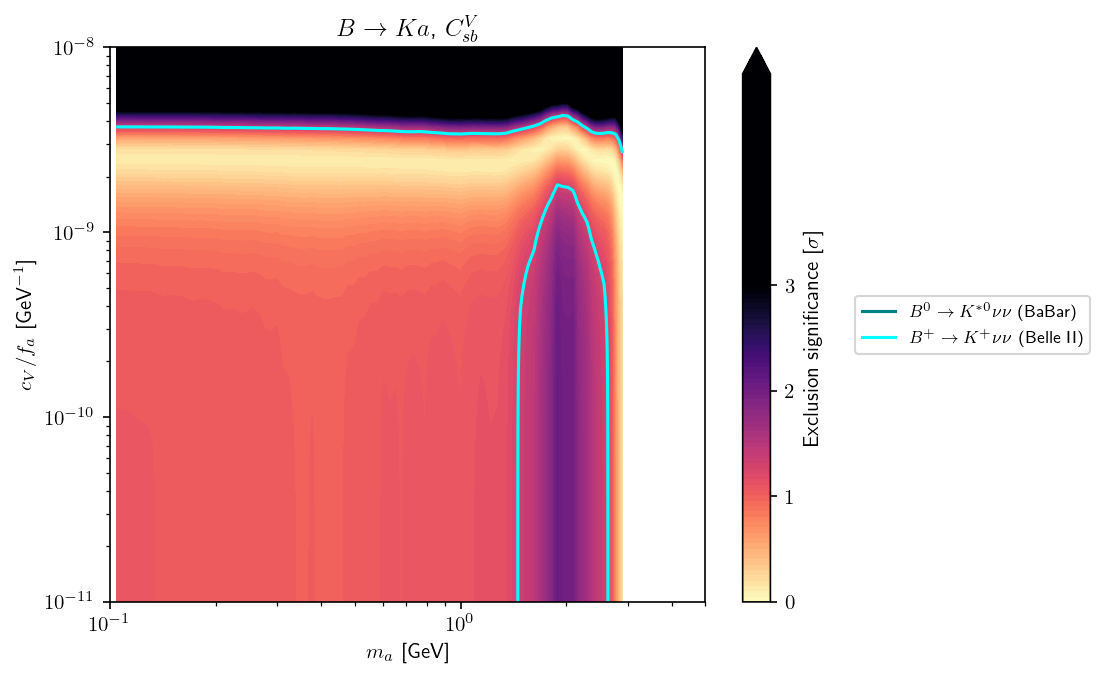

In [14]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal'}#, ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange', ('B+ -> K+ gamma gamma', 'BaBar'): 'blue', ('K+ -> pi+ a', 'NA62'): 'crimson'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$'}#, 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$', 'B+ -> K+ gamma gamma': r'$B^+ \to K^+ \gamma \gamma$', 'K+ -> pi+ a': r'$K^+ \to \pi^+ \nu \nu$'}
legend_elements = []

pl= plt.contourf(x_ma, y_cl/fa, nsigmas(np.real(chi2[('', 'Global')]),2), levels=list(np.linspace(0, 5, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2.items():
    if observable == ('', 'Global'):
        break
    plt.contour(x_ma, y_cl/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$c_V/f_a$ [GeV$^{-1}$]')
#plt.xlim(0.1, 5)
plt.title(rf'$B \to K a$, $C^V_{{sb}}$')
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)

## $c_L$ only ($c_V=c_A$)

In [26]:
fa = 1e3

ma_log = np.hstack([np.logspace(-1, 0, 60), np.linspace(1.01, 5, 60)])
csb_l_pos = np.logspace(-8, -3, 100)

x_ma, cl_pos = np.meshgrid(ma_log, csb_l_pos)

# Flatten the meshgrid arrays
cl_flat = cl_pos.flatten()

# Create a list to store the ALPcouplings objects
couplings_list_left = []

# Iterate over the flattened arrays and create ALPcouplings objects
for cl_val in cl_flat:
    coupling_left = ALPcouplings({'kD': np.array([[0, 0, 0], [0, 0, cl_val], [0, cl_val, 0] ])}, scale=100, basis='massbasis_ew').match_run(5.1, 'VA_below', 'leadinglog') 
    couplings_list_left.append(coupling_left)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_array_pos_left = np.array(couplings_list_left).reshape(cl_pos.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(csb_l_pos.shape, fa)

In [27]:
chi2 = get_chi2(transitions, x_ma, couplings_array_pos_left, fa, integrator='leadinglog')

/Users/mfzaso/Documents/Projects/P02_BtoKmumu/Programs/alp-aca/alpaca/statistics/chisquared.py:22: RuntimeWarning: divide by zero encountered in divide
  ctau = np.where(br_dark == 1.0, np.inf, 1e-7*hbarc_GeVnm/dw)
/Users/mfzaso/Documents/Projects/P02_BtoKmumu/Programs/alp-aca/alpaca/statistics/chisquared.py:22: RuntimeWarning: divide by zero encountered in divide
  ctau = np.where(br_dark == 1.0, np.inf, 1e-7*hbarc_GeVnm/dw)


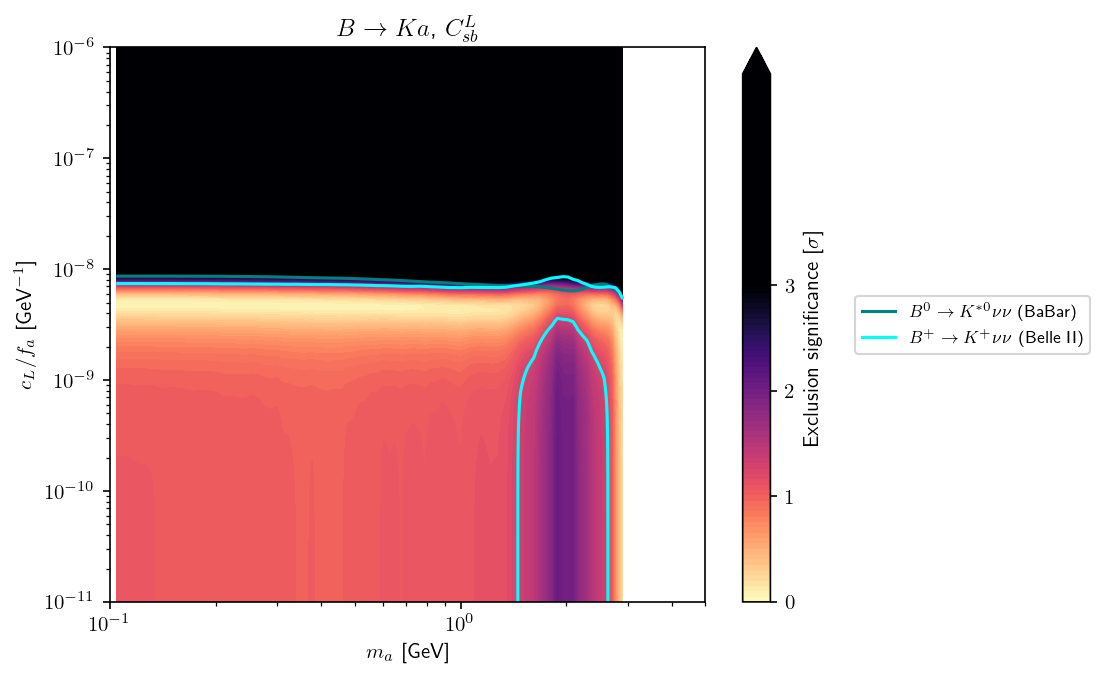

In [13]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal'}#, ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange', ('B+ -> K+ gamma gamma', 'BaBar'): 'blue', ('K+ -> pi+ a', 'NA62'): 'crimson'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$'}#, 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$', 'B+ -> K+ gamma gamma': r'$B^+ \to K^+ \gamma \gamma$', 'K+ -> pi+ a': r'$K^+ \to \pi^+ \nu \nu$'}
legend_elements = []

pl= plt.contourf(x_ma, cl_pos/fa, nsigmas(np.real(chi2[('', 'Global')]),2), levels=list(np.linspace(0, 5, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2.items():
    if observable == ('', 'Global'):
        break
    plt.contour(x_ma, cl_pos/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$c_L/f_a$ [GeV$^{-1}$]')
#plt.xlim(0.1, 5)
plt.title(rf'$B \to K a$, $C^L_{{sb}}$')
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)

# $c_R^{\mu \mu}$ vs. $c_R^{sb}$

In [ ]:
ma = 2
fa = 1e3

csb_vec_pos = np.logspace(-4, 0, 100)
cmu_vec_pos= np.logspace(-4, 0,100)

csb_pos, cmu_pos = np.meshgrid(csb_vec_pos, cmu_vec_pos)

# Flatten the meshgrid arrays
csb_flat = csb_pos.flatten()
cmu_flat = cmu_pos.flatten()

# Create a list to store the ALPcouplings objects
couplings_list_sbmu = []

# Iterate over the flattened arrays and create ALPcouplings objects
for csb_val, cmu_val in zip(csb_flat, cmu_flat):
    coupling_sbmu = ALPcouplings({'cuR': np.array([[0, 0, 0], [0, 0, csb_val], [0, csb_val, 0]]), 'clL': np.diag([0, cmu_val, 0])}, scale=fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    couplings_list_sbmu.append(coupling_sbmu)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_array_pos_sbmu = np.array(couplings_list_sbmu).reshape(csb_pos.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(csb_pos.shape, fa)
ma_grid = np.full(csb_pos.shape, ma)


In [ ]:
chi2_csbcmu_pos2 = get_chi2(transitions_gen, ma_grid, couplings_array_pos_sbmu, fa_grid, integrator='no_rge')

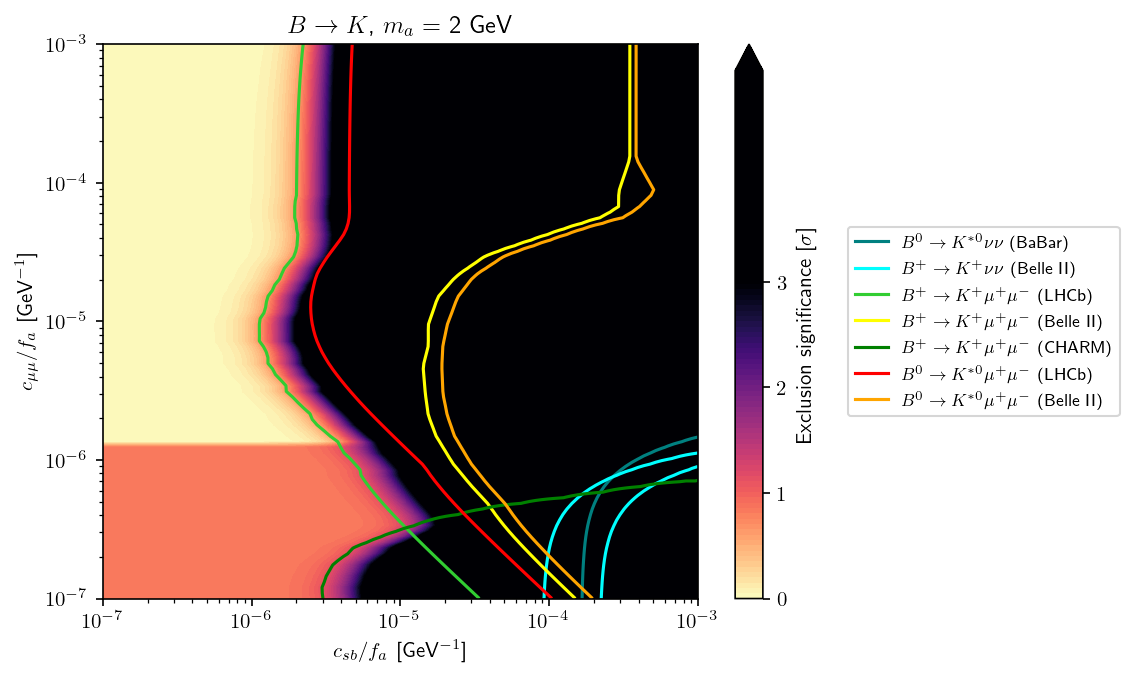

In [ ]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$'}
legend_elements = []

pl= plt.contourf(csb_pos/fa, cmu_pos/fa, nsigmas(np.real(chi2_csbcmu_pos2[('', 'Global')]),2), levels=list(np.linspace(0, 5, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2_csbcmu_pos2.items():
    if observable == ('', 'Global'):
        break
    plt.contour(csb_pos/fa, cmu_pos/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$c_{{sb}}/f_a$ [GeV$^{-1}$]')
plt.ylabel(r'$c_{\mu\mu}/f_a$ [GeV$^{-1}$]')
#plt.xlim(0.1, 5)
plt.title(rf'$B \to K$, $m_a=$ {ma} GeV')#, $f_a=$ {fa/1000} TeV')
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)

### Model QED-DFSZ

In [ ]:
from alpaca.uvmodels.model_library import QED_DFSZ, beta

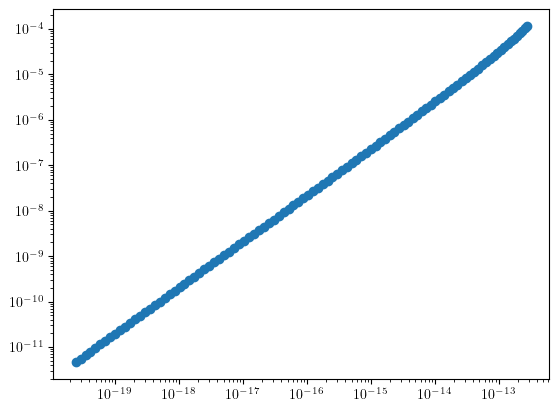

In [ ]:
ma = 2 #np.logspace(np.log10(0.103), np.log10(5.0), 100)
fa_log = np.logspace(3, 11, 100)

coupling_DFSZ = [QED_DFSZ.get_couplings({beta: np.pi/2}, fa_val).match_run(5.1, 'RL_below', 'leadinglog') for fa_val in fa_log]

cDFSZ_sb = []
cDFSZ_mu = []

for ii in range(len(fa_log)):
    cDFSZ_sb.append(abs(coupling_DFSZ[ii]['kd'][1,2])/fa_log[ii])
    cDFSZ_mu.append(abs(coupling_DFSZ[ii]['ke'][1,1])/fa_log[ii])
pl = plt.scatter(cDFSZ_sb, cDFSZ_mu)
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

### Model KSVZ-Q


In [ ]:
from alpaca.uvmodels.model_library import Q_KSVZ, KSVZ_charge

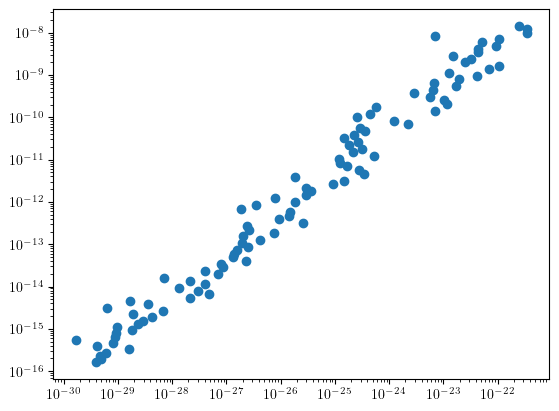

In [ ]:
ma = 2 
fa_log = np.logspace(3, 11, 100)

coupling_KSVZ = [Q_KSVZ.get_couplings({KSVZ_charge: 1}, 4*np.pi*fa_val).match_run(5.1, 'RL_below', 'leadinglog') for fa_val in fa_log]

cKSVZ_sb = []
cKSVZ_mu = []

for ii in range(len(fa_log)):
    cKSVZ_sb.append(np.abs(coupling_KSVZ[ii]['kd'][1,2])/fa_log[ii])
    cKSVZ_mu.append(np.abs(coupling_KSVZ[ii]['ke'][1,1])/fa_log[ii])
plt.scatter(cKSVZ_sb, cKSVZ_mu)
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

### Top-philic

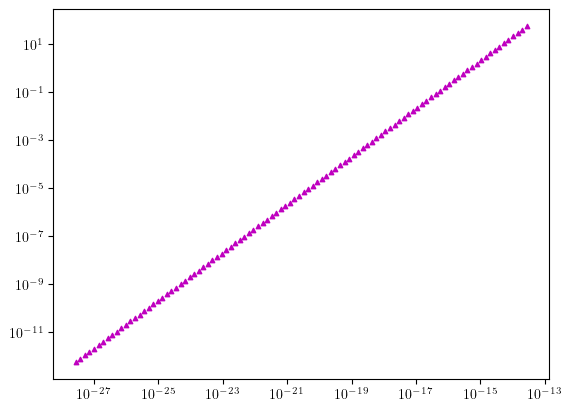

In [ ]:
fa = 1e3

ma = 2 #np.logspace(np.log10(0.103), np.log10(5.0), 100)
ct_pos = np.logspace(-8, 6, 100)

coupling = [ALPcouplings({'cuR': np.diag([0, 0, ct])}, scale=fa, basis='derivative_above').match_run(5.1, 'RL_below', 'leadinglog') for ct in ct_pos]

ctop_sb = []
ctop_mu = []

for ii in range(len(ct_pos)):
    ctop_sb.append(abs(coupling[ii]['kd'][1,2])/fa)
    ctop_mu.append(abs(coupling[ii]['ke'][1,1])/fa)
pl = plt.scatter(ctop_sb, ctop_mu, c='m',s=10,marker='^')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

In [ ]:
ma = 2
fa = 1e3

csb_vec_pos = np.logspace(-4, 0, 100)
cmu_vec_pos= np.logspace(-4, 0,100)

csb_pos, cmu_pos = np.meshgrid(csb_vec_pos, cmu_vec_pos)

# Flatten the meshgrid arrays
csb_flat = csb_pos.flatten()
cmu_flat = cmu_pos.flatten()

# Create a list to store the ALPcouplings objects
couplings_list_sbmu = []

# Iterate over the flattened arrays and create ALPcouplings objects
for csb_val, cmu_val in zip(csb_flat, cmu_flat):
    coupling_sbmu = ALPcouplings({'cuR': np.array([[0, 0, 0], [0, 0, csb_val], [0, csb_val, 0]]), 'ceR': np.diag([0, cmu_val, 0])}, scale=fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    couplings_list_sbmu.append(coupling_sbmu)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_array_pos_sbmu = np.array(couplings_list_sbmu).reshape(csb_pos.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(csb_pos.shape, fa)
ma_grid = np.full(csb_pos.shape, ma)


In [ ]:
chi2_csbcmu_pos2_2 = get_chi2(transitions_gen, ma_grid, couplings_array_pos_sbmu, fa_grid, integrator='no_rge')

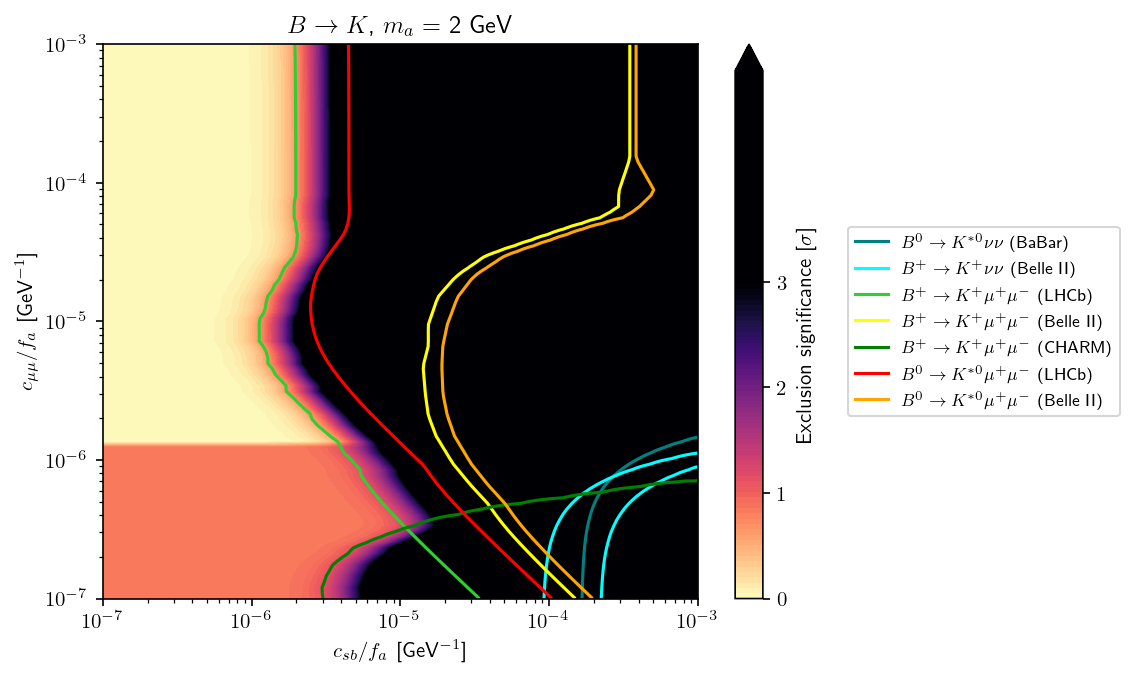

In [ ]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$'}
legend_elements = []

pl= plt.contourf(csb_pos/fa, cmu_pos/fa, nsigmas(np.real(chi2_csbcmu_pos2_2[('', 'Global')]),2), levels=list(np.linspace(0, 5, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2_csbcmu_pos2_2.items():
    if observable == ('', 'Global'):
        break
    plt.contour(csb_pos/fa, cmu_pos/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$c_{{sb}}/f_a$ [GeV$^{-1}$]')
plt.ylabel(r'$c_{\mu\mu}/f_a$ [GeV$^{-1}$]')
plt.scatter(cDFSZ_sb, cDFSZ_mu)
plt.scatter(cKSVZ_sb, cKSVZ_mu)
plt.scatter(ctop_sb, ctop_mu)
plt.xlim(1e-7, 1e-3)
plt.ylim(1e-7, 1e-3)
plt.title(rf'$B \to K$, $m_a=$ {ma} GeV')#, $f_a=$ {fa/1000} TeV')
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)

In [ ]:
chi2_csbcmu_pos2_3 = get_chi2(transitions, ma_grid, couplings_array_pos_sbmu, fa_grid, integrator='no_rge')

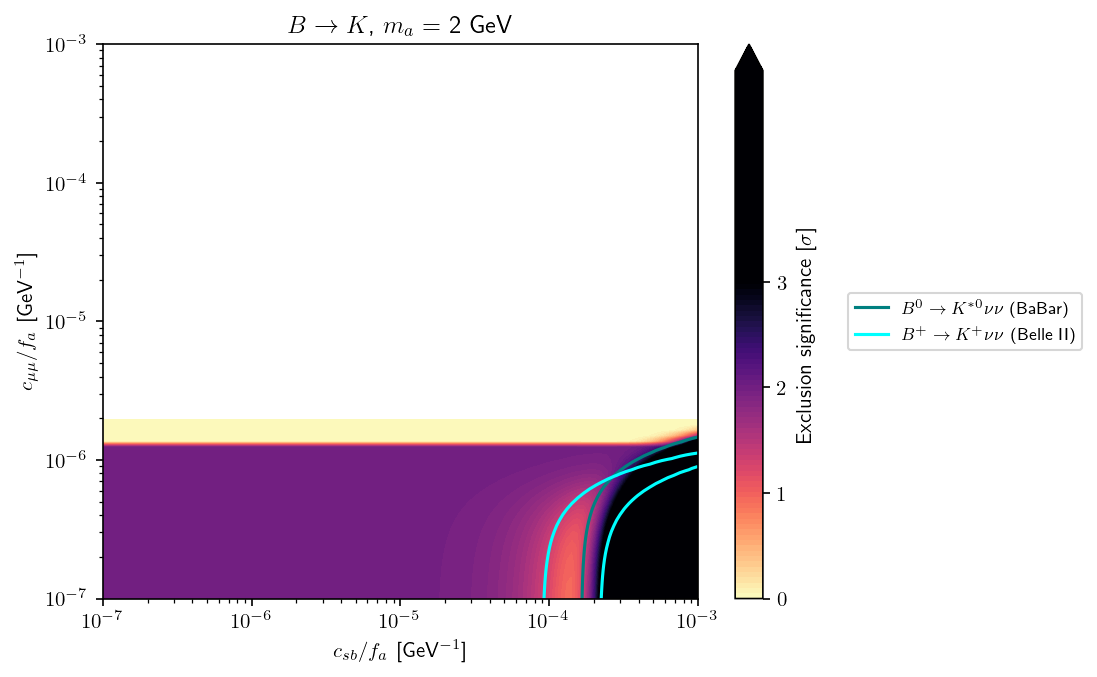

In [ ]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$'}
legend_elements = []

pl= plt.contourf(csb_pos/fa, cmu_pos/fa, nsigmas(np.real(chi2_csbcmu_pos2_3[('', 'Global')]),2), levels=list(np.linspace(0, 5, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2_csbcmu_pos2_3.items():
    if observable == ('', 'Global'):
        break
    plt.contour(csb_pos/fa, cmu_pos/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$c_{{sb}}/f_a$ [GeV$^{-1}$]')
plt.ylabel(r'$c_{\mu\mu}/f_a$ [GeV$^{-1}$]')
#plt.xlim(0.1, 5)
plt.title(rf'$B \to K$, $m_a=$ {ma} GeV')#, $f_a=$ {fa/1000} TeV')
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)

# $c_A^{\mu \mu}$ vs. $c_V^{sb}$

In [30]:
ma = 2
fa = 1e3

csb_vec_pos = np.logspace(-9, -3, 100)
cmu_axi_pos= np.logspace(-6, -1,100)

csb_pos, cmu_pos = np.meshgrid(csb_vec_pos, cmu_axi_pos)

# Flatten the meshgrid arrays
csb_flat = csb_pos.flatten()
cmu_flat = cmu_pos.flatten()

# Create a list to store the ALPcouplings objects
couplings_list_sbmu = []

# Iterate over the flattened arrays and create ALPcouplings objects
for csb_val, cmu_val in zip(csb_flat, cmu_flat):
    coupling_sbmu = ALPcouplings({'cqL': np.array([[0, 0, 0], [0, 0, csb_val], [0, np.conj(csb_val), 0]]), 'clL': np.diag([0, -cmu_val/2, 0]), 'ceL':np.diag([0, cmu_val/2, 0])}, scale=fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    couplings_list_sbmu.append(coupling_sbmu)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_array_pos_sbmu = np.array(couplings_list_sbmu).reshape(csb_pos.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(csb_pos.shape, fa)
ma_grid = np.full(csb_pos.shape, ma)


In [31]:
chi2_csbcmu_pos2 = get_chi2(transitions_gen, ma_grid, couplings_array_pos_sbmu, fa_grid, integrator='no_rge')

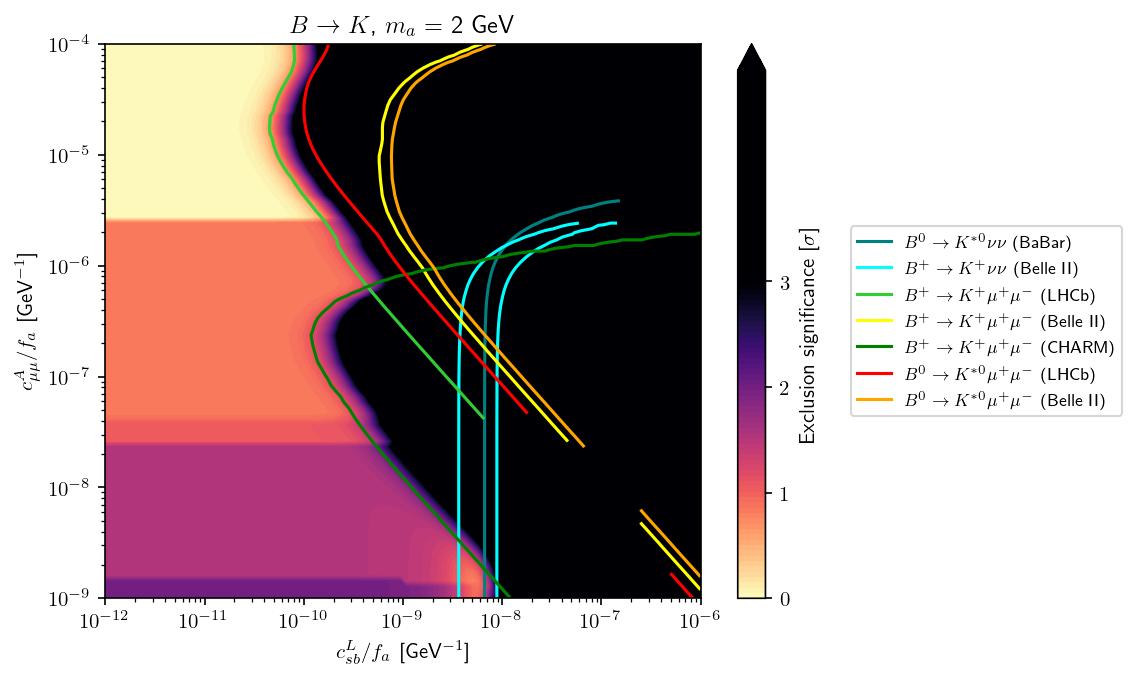

In [35]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$'}
legend_elements = []

pl= plt.contourf(csb_pos/fa, cmu_pos/fa, nsigmas(np.real(chi2_csbcmu_pos2[('', 'Global')]),2), levels=list(np.linspace(0, 5, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2_csbcmu_pos2.items():
    if observable == ('', 'Global'):
        break
    plt.contour(csb_pos/fa, cmu_pos/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$c^L_{{sb}}/f_a$ [GeV$^{-1}$]')
plt.ylabel(r'$c^A_{\mu\mu}/f_a$ [GeV$^{-1}$]')
#plt.xlim(0.1, 5)
plt.title(rf'$B \to K$, $m_a=$ {ma} GeV')#, $f_a=$ {fa/1000} TeV')
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)

### Model QED-DFSZ

In [11]:
from alpaca.uvmodels.model_library import QED_DFSZ, beta

In [99]:
ma = 2 #np.logspace(np.log10(0.103), np.log10(5.0), 100)
fa_log = np.logspace(3, 7, 100)
tangent = np.linspace(0.25,170,2)

coupling_DFSZ = []

for ii in range(len(tangent)):
    coupling_DFSZ.append([QED_DFSZ.get_couplings({beta: tangent[ii]}, fa_val).match_run(5.1, 'RL_below', 'leadinglog') for fa_val in fa_log])

KeyboardInterrupt: 

In [98]:
cDFSZ_sb_max = []
cDFSZ_mu_max = []
cDFSZ_sb_min = []
cDFSZ_mu_min = []
    
for jj in range(len(fa_log)):
    cDFSZ_sb_max.append(abs(coupling_DFSZ[0][jj]['kd'][1,2])/fa_log[jj])
    cDFSZ_mu_max.append(abs(coupling_DFSZ[0][jj]['ke'][1,1])/fa_log[jj])
    cDFSZ_sb_min.append(abs(coupling_DFSZ[1][jj]['kd'][1,2])/fa_log[jj])
    cDFSZ_mu_min.append(abs(coupling_DFSZ[1][jj]['ke'][1,1])/fa_log[jj])
plt.loglog(cDFSZ_sb_max, cDFSZ_mu_max, alpha=0)
plt.loglog(cDFSZ_sb_min, cDFSZ_mu_min, alpha=0)
plt.fill_betweenx(cDFSZ_mu_min, cDFSZ_sb_min, cDFSZ_sb_max, alpha=0.4,color="#C9521F")
ax.set_yscale('log')
ax.set_xscale('log')




IndexError: list index out of range

### Model KSVZ-Q


In [13]:
from alpaca.uvmodels.model_library import Q_KSVZ, KSVZ_charge

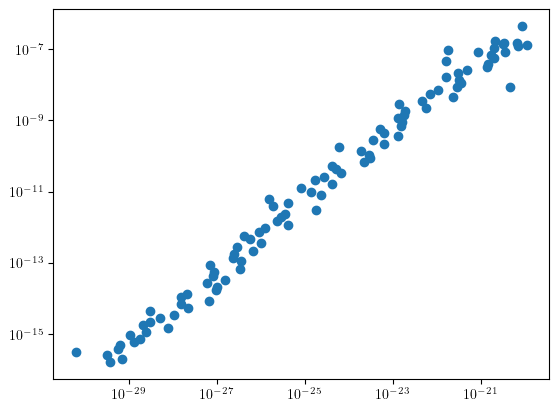

In [40]:
ma = 2 
fa_log = np.logspace(1, 11, 100)

coupling_KSVZ = [Q_KSVZ.get_couplings({KSVZ_charge: 1}, 4*np.pi*fa_val).match_run(5.1, 'RL_below', 'leadinglog') for fa_val in fa_log]

cKSVZ_sb = []
cKSVZ_mu = []

for ii in range(len(fa_log)):
    cKSVZ_sb.append(np.abs(coupling_KSVZ[ii]['kd'][1,2])/fa_log[ii])
    cKSVZ_mu.append(np.abs(coupling_KSVZ[ii]['ke'][1,1])/fa_log[ii])
plt.scatter(cKSVZ_sb, cKSVZ_mu)
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

### Top-philic

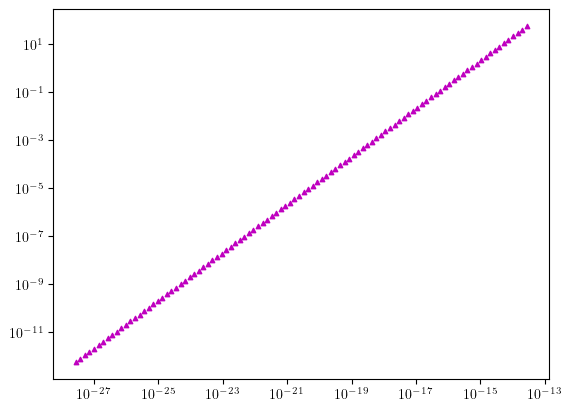

In [15]:
fa = 1e3

ma = 2 #np.logspace(np.log10(0.103), np.log10(5.0), 100)
ct_pos = np.logspace(-8, 6, 100)

coupling = [ALPcouplings({'cuR': np.diag([0, 0, ct])}, scale=fa, basis='derivative_above').match_run(5.1, 'RL_below', 'leadinglog') for ct in ct_pos]

ctop_sb = []
ctop_mu = []

for ii in range(len(ct_pos)):
    ctop_sb.append(abs(coupling[ii]['kd'][1,2])/fa)
    ctop_mu.append(abs(coupling[ii]['ke'][1,1])/fa)
pl = plt.scatter(ctop_sb, ctop_mu, c='m',s=10,marker='^')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

### General plot

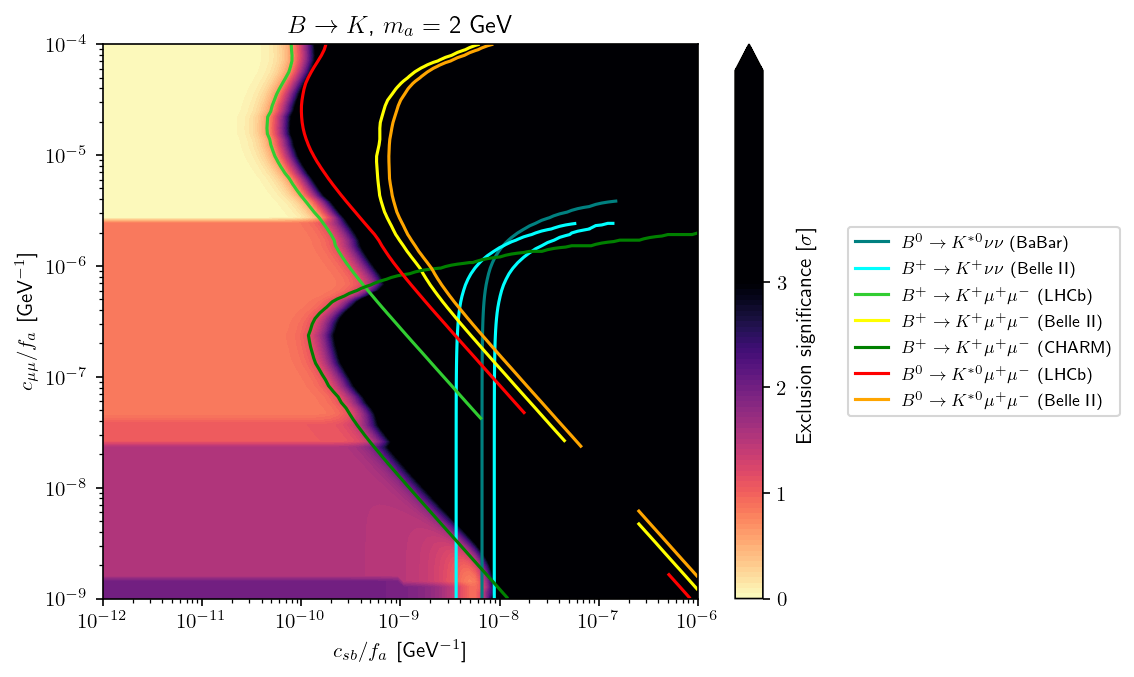

In [96]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$'}
legend_elements = []

pl= plt.contourf(csb_pos/fa, cmu_pos/fa, nsigmas(np.real(chi2_csbcmu_pos2[('', 'Global')]),2), levels=list(np.linspace(0, 5, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2_csbcmu_pos2.items():
    if observable == ('', 'Global'):
        break
    plt.contour(csb_pos/fa, cmu_pos/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$c_{{sb}}/f_a$ [GeV$^{-1}$]')
plt.ylabel(r'$c_{\mu\mu}/f_a$ [GeV$^{-1}$]')
plt.loglog(cDFSZ_sb_max, cDFSZ_mu_max, alpha=0)
plt.loglog(cDFSZ_sb_min, cDFSZ_mu_min, alpha=0)
plt.fill_betweenx(cDFSZ_mu_min, cDFSZ_sb_min, cDFSZ_sb_max, alpha=0.4,color="#C9521F")
plt.scatter(cKSVZ_sb, cKSVZ_mu)
plt.scatter(ctop_sb, ctop_mu)
plt.xlim(1e-12, 1e-6)
plt.ylim(1e-9, 1e-4)
plt.title(rf'$B \to K$, $m_a=$ {ma} GeV')#, $f_a=$ {fa/1000} TeV')
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)
